# Early Child Longitudinal Study

##Import Libraries & Modules

In [588]:
# Import modules and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
from scipy import stats

# from google.colab import drive
# drive.mount('/content/drive')

## Raw Data & Description

In [589]:
# Define file to load
# filename = '/content/drive/MyDrive/Academic/Master of Information/Year 2/Winter/INF2178 - Experimental Design for Data Science/INF2178_A3_data.csv'

# Define file to load -> Local
filename = 'INF2178_A3_data.csv'

# Store dataset in variables
df_raw = pd.read_csv(filename)

In [590]:
# Display raw dataset
df_raw

fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
0                 36.58          39.54                     33.822   
1                 50.82          44.44                     38.147   
2                 40.68          28.57                     28.108   
3                 32.57          23.57                     15.404   
4                 31.98          19.65                     18.727   
...                 ...            ...                        ...   
11928             32.51          25.68                     11.694   
11929             31.96          25.73                     21.461   
11930             40.44          30.50                     16.836   
11931             35.51          28.96                     28.864   
11932             23.47          14.30                     15.256   

       springreadingscore  springmathscore  springgeneralknowledgescore  \
0                   49.37            50.10                       40.533   
1                   83.50            58.93                       37.409   
2                   40.41            32.81                       29.312   
3                   34.14            35.25                       27.382   
4                   32.84            23.60                       26.977   
...                   ...              ...                          ...   
11928               45.63            24.27                       20.189   
11929               47.84            40.35                       32.357   
11930               49.93            41.00                       19.803   
11931               51.60            50.27                       35.991   
11932               31.41            17.49                       18.283   

       totalhouseholdincome  incomeinthousands  incomegroup  
0                  140000.0              140.0            3  
1                  120000.0              120.0            3  
2                   90000.0               90.0            3  
3                   50000.0               50.0            2  
4                   55000.0               55.0            2  
...                     ...                ...          ...  
11928               39000.0               39.0            1  
11929               26000.0               26.0            1  
11930               45000.0               45.0            2  
11931               28000.0               28.0            1  
11932               13000.0               13.0            1  

[11933 rows x 9 columns]

# Data Cleaning & Data Wrangling

In [591]:
# Display df details
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [592]:
# Define a list of columns to be dropped from the df
dropped_columns = []

# Drop the specified columns from the raw df and assign the result to a new df
df = df_raw.drop(dropped_columns, axis=1)

In [593]:
# New column names
column_names = [
    "FALL_READING_SCORE",
    "FALL_MATH_SCORE",
    "FALL_GK_SCORE",
    "SPRING_READING_SCORE",
    "SPRING_MATH_SCORE",
    "SPRING_GK_SCORE",
    "TOTAL_HOUSEHOLD_INCOME",
    "INCOME_THOUSANDS",
    "INCOME_GROUP"]

# Assigning new column names to the DataFrame
df.columns = column_names

# Displaying the DataFrame with updated column names
df

FALL_READING_SCORE  FALL_MATH_SCORE  FALL_GK_SCORE  \
0                   36.58            39.54         33.822   
1                   50.82            44.44         38.147   
2                   40.68            28.57         28.108   
3                   32.57            23.57         15.404   
4                   31.98            19.65         18.727   
...                   ...              ...            ...   
11928               32.51            25.68         11.694   
11929               31.96            25.73         21.461   
11930               40.44            30.50         16.836   
11931               35.51            28.96         28.864   
11932               23.47            14.30         15.256   

       SPRING_READING_SCORE  SPRING_MATH_SCORE  SPRING_GK_SCORE  \
0                     49.37              50.10           40.533   
1                     83.50              58.93           37.409   
2                     40.41              32.81           29.312   
3                     34.14              35.25           27.382   
4                     32.84              23.60           26.977   
...                     ...                ...              ...   
11928                 45.63              24.27           20.189   
11929                 47.84              40.35           32.357   
11930                 49.93              41.00           19.803   
11931                 51.60              50.27           35.991   
11932                 31.41              17.49           18.283   

       TOTAL_HOUSEHOLD_INCOME  INCOME_THOUSANDS  INCOME_GROUP  
0                    140000.0             140.0             3  
1                    120000.0             120.0             3  
2                     90000.0              90.0             3  
3                     50000.0              50.0             2  
4                     55000.0              55.0             2  
...                       ...               ...           ...  
11928                 39000.0              39.0             1  
11929                 26000.0              26.0             1  
11930                 45000.0              45.0             2  
11931                 28000.0              28.0             1  
11932                 13000.0              13.0             1  

[11933 rows x 9 columns]

In [594]:
# Deiplay df statistics
df.describe()

FALL_READING_SCORE  FALL_MATH_SCORE  FALL_GK_SCORE  \
count        11933.000000     11933.000000   11933.000000   
mean            35.954215        27.128244      23.073694   
std             10.473130         9.120505       7.396978   
min             21.010000        10.510000       6.985000   
25%             29.340000        20.680000      17.385000   
50%             34.060000        25.680000      22.954000   
75%             39.890000        31.590000      28.305000   
max            138.510000       115.650000      47.691000   

       SPRING_READING_SCORE  SPRING_MATH_SCORE  SPRING_GK_SCORE  \
count          11933.000000       11933.000000     11933.000000   
mean              47.511178          37.799461        28.235584   
std               14.327111          12.027753         7.577457   
min               22.350000          11.900000         7.858000   
25%               38.950000          29.270000        22.802000   
50%               45.320000          36.410000        28.583000   
75%               51.770000          44.220000        33.782000   
max              156.850000         113.800000        48.345000   

       TOTAL_HOUSEHOLD_INCOME  INCOME_THOUSANDS  INCOME_GROUP  
count            11933.000000      11933.000000  11933.000000  
mean             54317.199930         54.317200      1.895165  
std              36639.061147         36.639061      0.822692  
min                  1.000000          0.001000      1.000000  
25%              27000.000000         27.000000      1.000000  
50%              47000.000000         47.000000      2.000000  
75%              72000.000000         72.000000      3.000000  
max             150000.000000        150.000000      3.000000

array([[<Axes: title={'center': 'FALL_READING_SCORE'}>,
        <Axes: title={'center': 'FALL_MATH_SCORE'}>,
        <Axes: title={'center': 'FALL_GK_SCORE'}>],
       [<Axes: title={'center': 'SPRING_READING_SCORE'}>,
        <Axes: title={'center': 'SPRING_MATH_SCORE'}>,
        <Axes: title={'center': 'SPRING_GK_SCORE'}>],
       [<Axes: title={'center': 'TOTAL_HOUSEHOLD_INCOME'}>,
        <Axes: title={'center': 'INCOME_THOUSANDS'}>,
        <Axes: title={'center': 'INCOME_GROUP'}>]], dtype=object)

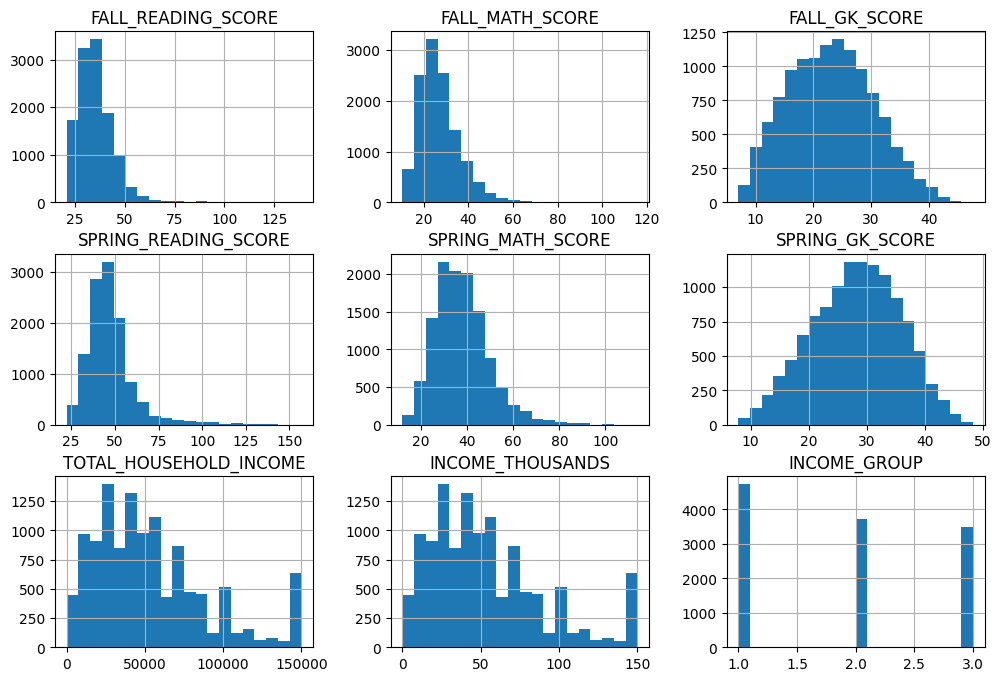

In [595]:
# Plot histograms for all numerical columns in the df
df.hist(figsize=(12,8), bins=20)

## Feature Cleaning

### Re-label Income Groups

In [596]:
# Convert INCOME_GROUP column to 'string' type
df['INCOME_GROUP'] = df['INCOME_GROUP'].astype('string')

# SHow df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FALL_READING_SCORE      11933 non-null  float64
 1   FALL_MATH_SCORE         11933 non-null  float64
 2   FALL_GK_SCORE           11933 non-null  float64
 3   SPRING_READING_SCORE    11933 non-null  float64
 4   SPRING_MATH_SCORE       11933 non-null  float64
 5   SPRING_GK_SCORE         11933 non-null  float64
 6   TOTAL_HOUSEHOLD_INCOME  11933 non-null  float64
 7   INCOME_THOUSANDS        11933 non-null  float64
 8   INCOME_GROUP            11933 non-null  string 
dtypes: float64(8), string(1)
memory usage: 839.2 KB


In [597]:
# Duplicate column
df['INCOME_GROUP_NUM'] = pd.to_numeric(df['INCOME_GROUP'], errors='coerce')

In [598]:
# Rename the income group level 1, 2, 3, to LOW_INCOME, AVERAGE_INCOME, HIGH_INCOME
df['INCOME_GROUP'].replace(to_replace='1', value='LOW_INCOME', inplace=True)
df['INCOME_GROUP'].replace(to_replace='2', value='AVERAGE_INCOME', inplace=True)
df['INCOME_GROUP'].replace(to_replace='3', value='HIGH_INCOME', inplace=True)
df

FALL_READING_SCORE  FALL_MATH_SCORE  FALL_GK_SCORE  \
0                   36.58            39.54         33.822   
1                   50.82            44.44         38.147   
2                   40.68            28.57         28.108   
3                   32.57            23.57         15.404   
4                   31.98            19.65         18.727   
...                   ...              ...            ...   
11928               32.51            25.68         11.694   
11929               31.96            25.73         21.461   
11930               40.44            30.50         16.836   
11931               35.51            28.96         28.864   
11932               23.47            14.30         15.256   

       SPRING_READING_SCORE  SPRING_MATH_SCORE  SPRING_GK_SCORE  \
0                     49.37              50.10           40.533   
1                     83.50              58.93           37.409   
2                     40.41              32.81           29.312   
3                     34.14              35.25           27.382   
4                     32.84              23.60           26.977   
...                     ...                ...              ...   
11928                 45.63              24.27           20.189   
11929                 47.84              40.35           32.357   
11930                 49.93              41.00           19.803   
11931                 51.60              50.27           35.991   
11932                 31.41              17.49           18.283   

       TOTAL_HOUSEHOLD_INCOME  INCOME_THOUSANDS    INCOME_GROUP  \
0                    140000.0             140.0     HIGH_INCOME   
1                    120000.0             120.0     HIGH_INCOME   
2                     90000.0              90.0     HIGH_INCOME   
3                     50000.0              50.0  AVERAGE_INCOME   
4                     55000.0              55.0  AVERAGE_INCOME   
...                       ...               ...             ...   
11928                 39000.0              39.0      LOW_INCOME   
11929                 26000.0              26.0      LOW_INCOME   
11930                 45000.0              45.0  AVERAGE_INCOME   
11931                 28000.0              28.0      LOW_INCOME   
11932                 13000.0              13.0      LOW_INCOME   

       INCOME_GROUP_NUM  
0                     3  
1                     3  
2                     3  
3                     2  
4                     2  
...                 ...  
11928                 1  
11929                 1  
11930                 2  
11931                 1  
11932                 1  

[11933 rows x 10 columns]

### Round Numerical Column

In [599]:
# Rounding the values in the 'INCOME_THOUSANDS'
df['INCOME_THOUSANDS'].apply(np.round)

0        140.0
1        120.0
2         90.0
3         50.0
4         55.0
         ...  
11928     39.0
11929     26.0
11930     45.0
11931     28.0
11932     13.0
Name: INCOME_THOUSANDS, Length: 11933, dtype: float64

##Feature Engineering

In [600]:
# Calculate the difference in reading scores between Spring and Fall evaluations
df['DELTA_READING_SCORE'] = np.subtract(df['SPRING_READING_SCORE'], df['FALL_READING_SCORE']).apply(pd.to_numeric)

# Calculate the difference in math scores between Spring and Fall evaluations
df['DELTA_MATH_SCORE'] = np.subtract(df['SPRING_MATH_SCORE'], df['FALL_MATH_SCORE']).apply(pd.to_numeric)

# Calculate the difference in general knowledge scores between Spring and Fall evaluations
df['DELTA_GK_SCORE'] = np.subtract(df['SPRING_GK_SCORE'], df['FALL_GK_SCORE']).apply(pd.to_numeric)

In [601]:
# Make a copy of df with outliers
df_with_outlier = df.copy()

In [602]:
# Display statics for numeric variable
df_with_outlier.describe()

FALL_READING_SCORE  FALL_MATH_SCORE  FALL_GK_SCORE  \
count        11933.000000     11933.000000   11933.000000   
mean            35.954215        27.128244      23.073694   
std             10.473130         9.120505       7.396978   
min             21.010000        10.510000       6.985000   
25%             29.340000        20.680000      17.385000   
50%             34.060000        25.680000      22.954000   
75%             39.890000        31.590000      28.305000   
max            138.510000       115.650000      47.691000   

       SPRING_READING_SCORE  SPRING_MATH_SCORE  SPRING_GK_SCORE  \
count          11933.000000       11933.000000     11933.000000   
mean              47.511178          37.799461        28.235584   
std               14.327111          12.027753         7.577457   
min               22.350000          11.900000         7.858000   
25%               38.950000          29.270000        22.802000   
50%               45.320000          36.410000        28.583000   
75%               51.770000          44.220000        33.782000   
max              156.850000         113.800000        48.345000   

       TOTAL_HOUSEHOLD_INCOME  INCOME_THOUSANDS  INCOME_GROUP_NUM  \
count            11933.000000      11933.000000      11933.000000   
mean             54317.199930         54.317200          1.895165   
std              36639.061147         36.639061          0.822692   
min                  1.000000          0.001000          1.000000   
25%              27000.000000         27.000000          1.000000   
50%              47000.000000         47.000000          2.000000   
75%              72000.000000         72.000000          3.000000   
max             150000.000000        150.000000          3.000000   

       DELTA_READING_SCORE  DELTA_MATH_SCORE  DELTA_GK_SCORE  
count         11933.000000      11933.000000    11933.000000  
mean             11.556963         10.671218        5.161890  
std               8.085004          6.855263        4.054906  
min             -44.760000        -22.160000      -14.183000  
25%               6.470000          6.010000        2.472000  
50%              10.400000          9.860000        5.047000  
75%              15.150000         14.330000        7.781000  
max              91.940000         75.350000       27.785000

## Removing Outliers

In [603]:
# This function remove outliers in selected columns of a df
def remove_outliers(df, columns):
  for column in columns:
    # Calculate the interquartile range (IQR) for the current column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN values
    df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)
  return df

In [604]:
# Select numerical columns
numerical_columns = df.columns[0:7]

# Remove outliers from numerical columns
df = remove_outliers(df, numerical_columns)

In [605]:
# Remove rows containing missing values
df = df.dropna()

# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10446 entries, 2 to 11932
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FALL_READING_SCORE      10446 non-null  float64
 1   FALL_MATH_SCORE         10446 non-null  float64
 2   FALL_GK_SCORE           10446 non-null  float64
 3   SPRING_READING_SCORE    10446 non-null  float64
 4   SPRING_MATH_SCORE       10446 non-null  float64
 5   SPRING_GK_SCORE         10446 non-null  float64
 6   TOTAL_HOUSEHOLD_INCOME  10446 non-null  float64
 7   INCOME_THOUSANDS        10446 non-null  float64
 8   INCOME_GROUP            10446 non-null  string 
 9   INCOME_GROUP_NUM        10446 non-null  int64  
 10  DELTA_READING_SCORE     10446 non-null  float64
 11  DELTA_MATH_SCORE        10446 non-null  float64
 12  DELTA_GK_SCORE          10446 non-null  float64
dtypes: float64(11), int64(1), string(1)
memory usage: 1.1 MB


In [606]:
df_eda_1 = df.drop('TOTAL_HOUSEHOLD_INCOME', axis=1)

# Exploratory Data Analysis

## Initial EDA

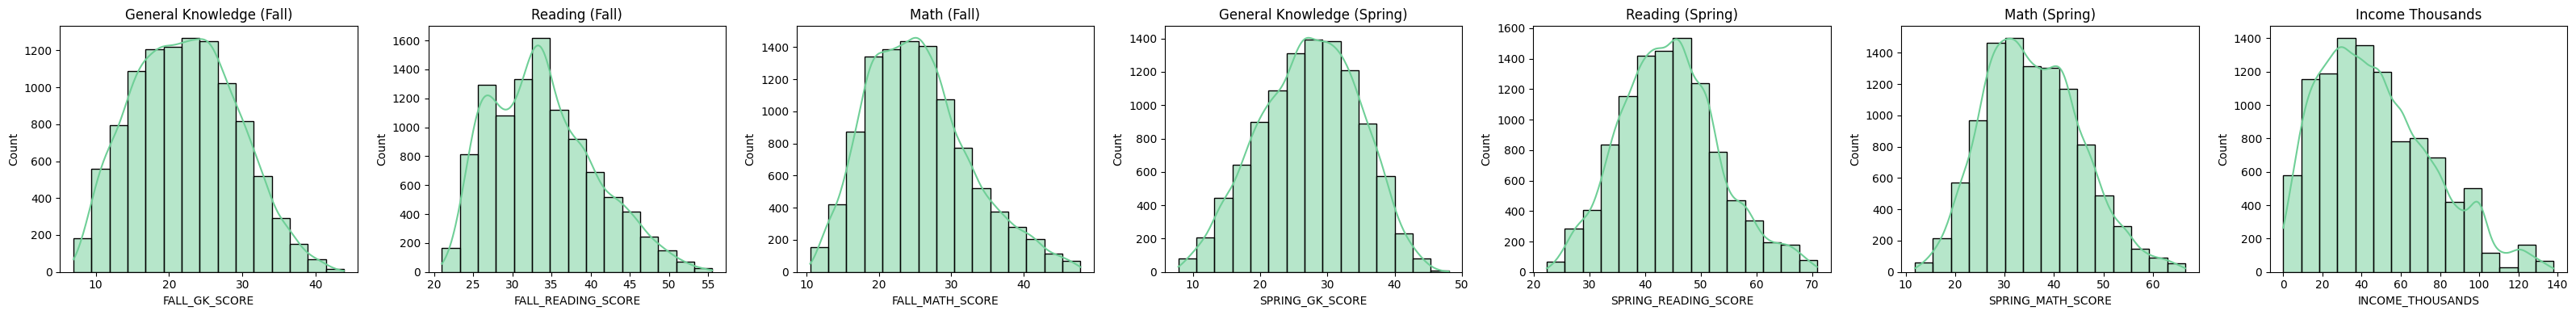

In [607]:
# Set the number of bins for histograms
bins_number = 15

# Plot histograms for the data above on one canvas
fig, axes = plt.subplots(1, 7, figsize=(32, 4))

# Plot histogram with KDE for General Knowledge (Fall) data
sns.histplot(df_eda_1.FALL_GK_SCORE, bins=bins_number, edgecolor='black', color='#6FCF97', kde=True, ax=axes[0])
axes[0].set_title('General Knowledge (Fall)')

# Plot histogram with KDE for Reading (Fall) data
sns.histplot(df_eda_1.FALL_READING_SCORE, bins=bins_number, edgecolor='black', color='#6FCF97', kde=True, ax=axes[1])
axes[1].set_title('Reading (Fall)')

# Plot histogram with KDE for Math (Fall) data
sns.histplot(df_eda_1.FALL_MATH_SCORE, bins=bins_number, edgecolor='black', color='#6FCF97', kde=True, ax=axes[2])
axes[2].set_title('Math (Fall)')

# Plot histogram with KDE for General Knowledge (Spring) data
sns.histplot(df_eda_1.SPRING_GK_SCORE, bins=bins_number, edgecolor='black', color='#6FCF97', kde=True, ax=axes[3])
axes[3].set_title('General Knowledge (Spring)')

# Plot histogram with KDE for Reading (Spring) data
sns.histplot(df_eda_1.SPRING_READING_SCORE, bins=bins_number, edgecolor='black', color='#6FCF97', kde=True, ax=axes[4])
axes[4].set_title('Reading (Spring)')

# Plot histogram with KDE for Math (Spring) data
sns.histplot(df_eda_1.SPRING_MATH_SCORE, bins=bins_number, edgecolor='black', color='#6FCF97', kde=True, ax=axes[5])
axes[5].set_title('Math (Spring)')

# Plot histogram with KDE for Math (Spring) data
sns.histplot(df_eda_1.INCOME_THOUSANDS, bins=bins_number, edgecolor='black', color='#6FCF97', kde=True, ax=axes[6])
axes[6].set_title('Income Thousands')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [608]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors and their positions along the colormap
colors = [(0, '#FFFFFF'),
          (0.5, '#4a86e8'),
          (1, '#000000')]

# Create the custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

<ipython-input-609-d8f808fbde5c>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_eda_1.drop(['DELTA_MATH_SCORE', 'DELTA_READING_SCORE', 'DELTA_GK_SCORE', 'INCOME_GROUP_NUM'], axis=1).corr()


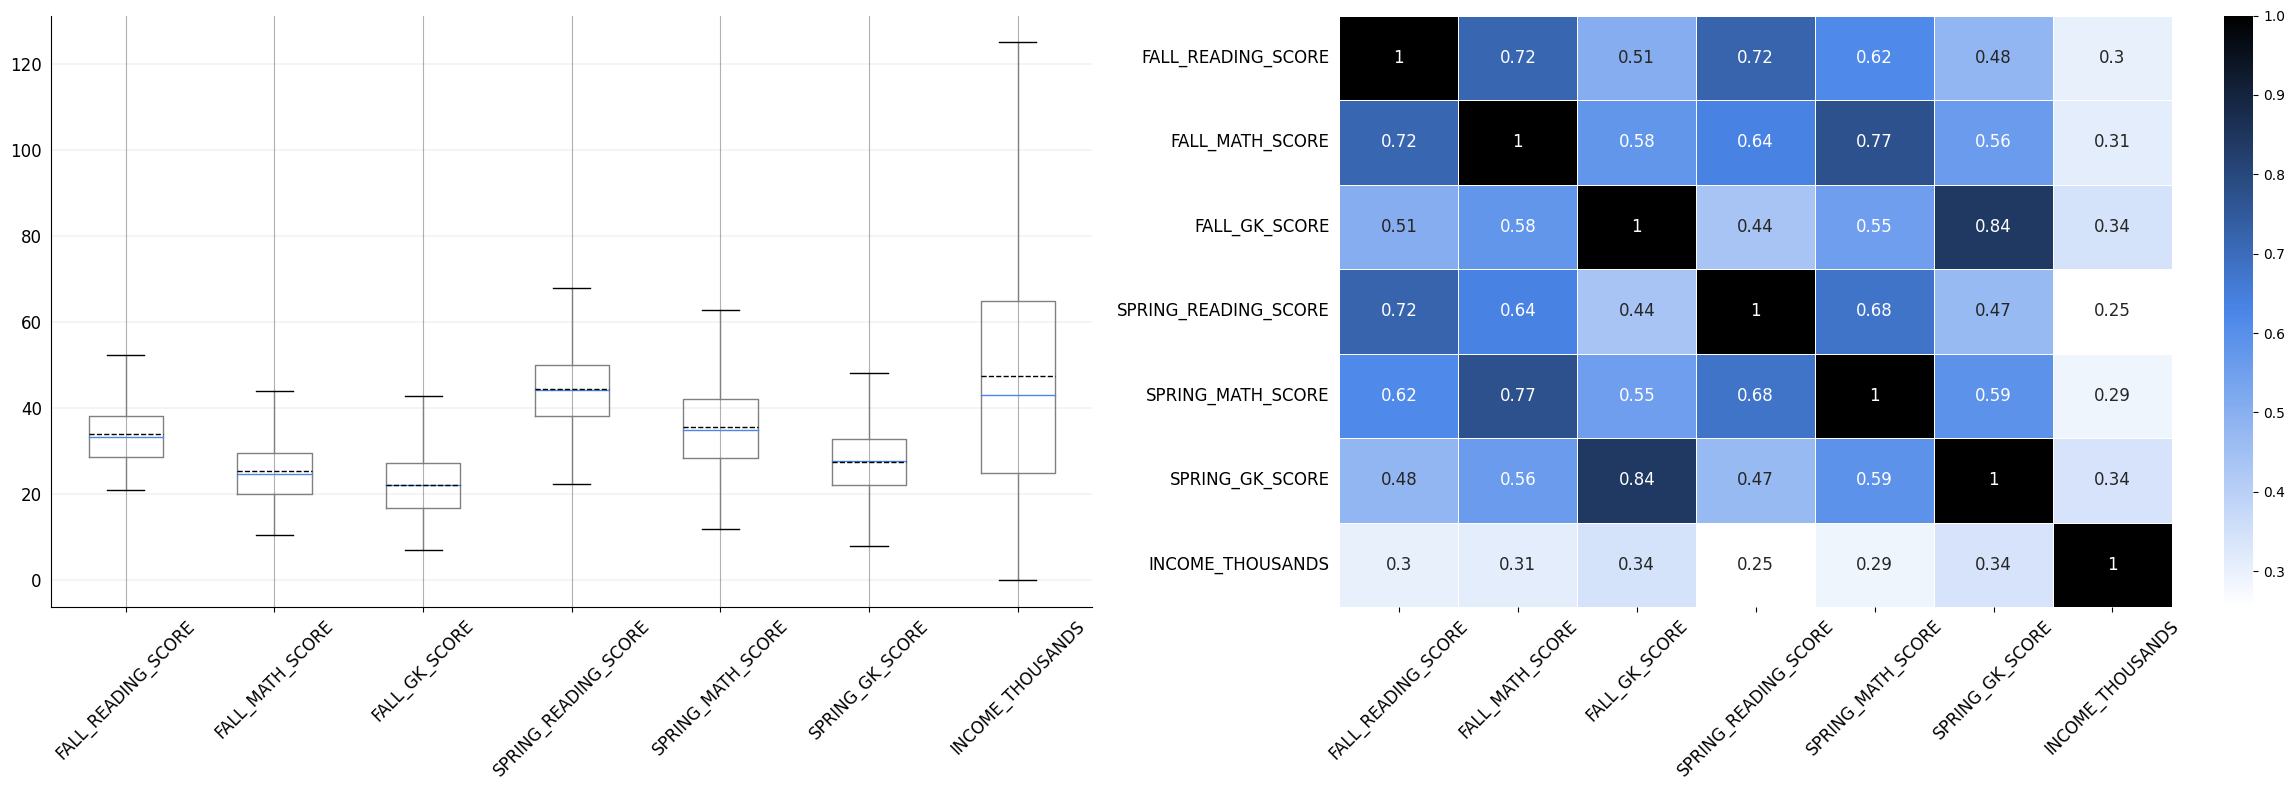

In [609]:
# Create subplots with one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Set facecolor of the subplots to white
for ax in axs:
    ax.set_facecolor('white')

# Remove top and right border from both subplots
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove y-axis tick marks from both subplots
for ax in axs:
    ax.yaxis.set_ticks_position('none')

# Add gridlines in the y-axis for the boxplot
axs[0].grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Plot the boxplot on the first subplot
df_eda_1.drop(['DELTA_MATH_SCORE', 'DELTA_READING_SCORE', 'DELTA_GK_SCORE', 'INCOME_GROUP_NUM'], axis=1).boxplot(ax=axs[0],
          meanline=True,
          showmeans=True,
          showfliers=False,
          boxprops=dict(color='grey'),
          whiskerprops=dict(color='grey'),
          medianprops=dict(color='#4a86e8'),
          meanprops=dict(color='#000000'),
          fontsize=12,
           rot=45
        )

# Create and store the correlation matrix
correlation_matrix = df_eda_1.drop(['DELTA_MATH_SCORE', 'DELTA_READING_SCORE', 'DELTA_GK_SCORE', 'INCOME_GROUP_NUM'], axis=1).corr()

# Create a heatmap using seaborn
heatmap = sns.heatmap(correlation_matrix, annot=True, linewidths=.5, annot_kws={"size": 12}, ax=axs[1], cmap=custom_cmap)

# Set title for the heatmap
#heatmap.set_title('Correlation Matrix Heatmap')

# Adjust x-axis tick label size for the heatmap
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)

# Adjust y-axis tick label size for the heatmap
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=0)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


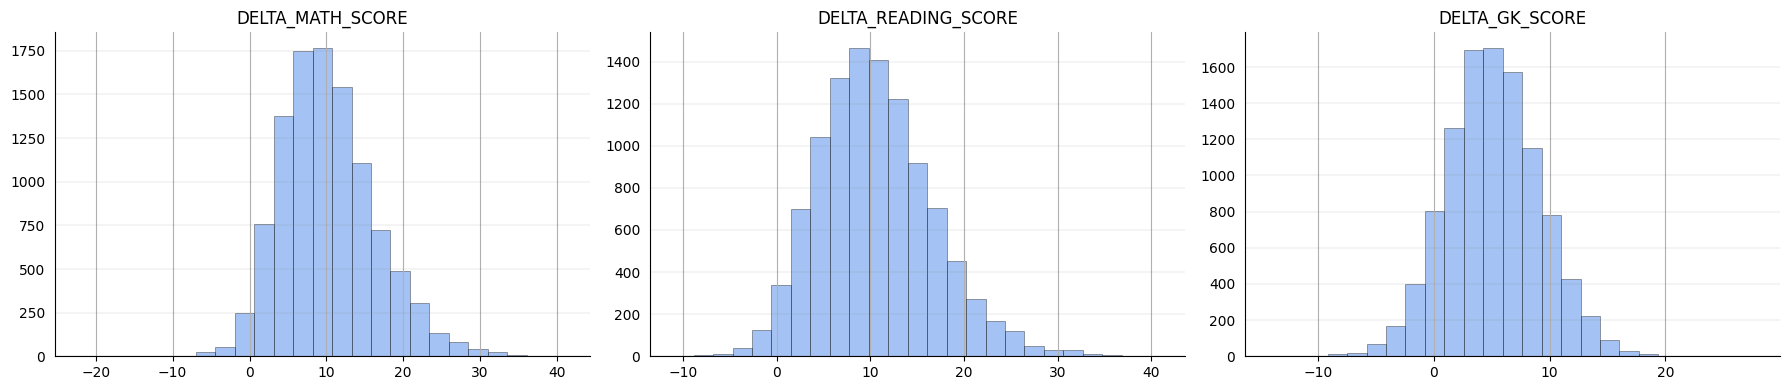

In [610]:
import matplotlib.pyplot as plt

# Plot settings
fig, axs = plt.subplots(1, 3, figsize=(18, 4), facecolor='white')

# Remove top and right border from all subplots
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axs:
    ax.set_facecolor('white')

# Remove y-axis tick marks from all subplots
for ax in axs:
    ax.yaxis.set_ticks_position('none')

# Add gridlines in the y-axis for all subplots
for ax in axs:
    ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Plot histograms
df_eda_1[['DELTA_MATH_SCORE', 'DELTA_READING_SCORE', 'DELTA_GK_SCORE']].hist(ax=axs, figsize=(16, 6), bins=25, color='#4a86e8', alpha=.5, edgecolor='black', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Display plot
plt.show()


## Income Group Interval

In [611]:
# New df
df_eda_2 = df_with_outlier

In [612]:
# Show statistics
df_with_outlier.describe()

FALL_READING_SCORE  FALL_MATH_SCORE  FALL_GK_SCORE  \
count        11933.000000     11933.000000   11933.000000   
mean            35.954215        27.128244      23.073694   
std             10.473130         9.120505       7.396978   
min             21.010000        10.510000       6.985000   
25%             29.340000        20.680000      17.385000   
50%             34.060000        25.680000      22.954000   
75%             39.890000        31.590000      28.305000   
max            138.510000       115.650000      47.691000   

       SPRING_READING_SCORE  SPRING_MATH_SCORE  SPRING_GK_SCORE  \
count          11933.000000       11933.000000     11933.000000   
mean              47.511178          37.799461        28.235584   
std               14.327111          12.027753         7.577457   
min               22.350000          11.900000         7.858000   
25%               38.950000          29.270000        22.802000   
50%               45.320000          36.410000        28.583000   
75%               51.770000          44.220000        33.782000   
max              156.850000         113.800000        48.345000   

       TOTAL_HOUSEHOLD_INCOME  INCOME_THOUSANDS  INCOME_GROUP_NUM  \
count            11933.000000      11933.000000      11933.000000   
mean             54317.199930         54.317200          1.895165   
std              36639.061147         36.639061          0.822692   
min                  1.000000          0.001000          1.000000   
25%              27000.000000         27.000000          1.000000   
50%              47000.000000         47.000000          2.000000   
75%              72000.000000         72.000000          3.000000   
max             150000.000000        150.000000          3.000000   

       DELTA_READING_SCORE  DELTA_MATH_SCORE  DELTA_GK_SCORE  
count         11933.000000      11933.000000    11933.000000  
mean             11.556963         10.671218        5.161890  
std               8.085004          6.855263        4.054906  
min             -44.760000        -22.160000      -14.183000  
25%               6.470000          6.010000        2.472000  
50%              10.400000          9.860000        5.047000  
75%              15.150000         14.330000        7.781000  
max              91.940000         75.350000       27.785000

In [613]:
# Filter and sort df
df_eda_2[['INCOME_GROUP', 'TOTAL_HOUSEHOLD_INCOME']].loc[df_eda_2['INCOME_GROUP'] == 'LOW_INCOME'].sort_values(by='TOTAL_HOUSEHOLD_INCOME')

INCOME_GROUP  TOTAL_HOUSEHOLD_INCOME
446    LOW_INCOME                     1.0
4857   LOW_INCOME                     1.0
5347   LOW_INCOME                     1.0
3539   LOW_INCOME                     1.0
6117   LOW_INCOME                     1.0
...           ...                     ...
9010   LOW_INCOME                 39000.0
7023   LOW_INCOME                 39000.0
5883   LOW_INCOME                 39000.0
5550   LOW_INCOME                 39257.0
9576   LOW_INCOME                 39800.0

[4729 rows x 2 columns]

In [614]:
# Calculate the minimum household income for each income group
min_income = df_eda_2[['INCOME_GROUP', 'TOTAL_HOUSEHOLD_INCOME']].groupby('INCOME_GROUP').min().sort_values(by='TOTAL_HOUSEHOLD_INCOME')

# Display
min_income

TOTAL_HOUSEHOLD_INCOME
INCOME_GROUP                          
LOW_INCOME                         1.0
AVERAGE_INCOME                 40000.0
HIGH_INCOME                    70000.0

In [615]:
# Calculate the maximum household income for each income group
max_income = df_eda_2[['INCOME_GROUP', 'TOTAL_HOUSEHOLD_INCOME']].groupby('INCOME_GROUP').max().sort_values(by='TOTAL_HOUSEHOLD_INCOME')
max_income

TOTAL_HOUSEHOLD_INCOME
INCOME_GROUP                          
LOW_INCOME                     39800.0
AVERAGE_INCOME                 69700.0
HIGH_INCOME                   150000.0

In [616]:
# Concatenate the df min_income and df max_income to create a df showing the income intervals
income_interval = pd.concat([min_income, max_income], axis=1)

# Set column names for the resulting DataFrame
column_names_2 = ['MINIMUM_INCOME', 'MAXIMUM_INCOME']
income_interval.columns = column_names_2

# Display df
income_interval


MINIMUM_INCOME  MAXIMUM_INCOME
INCOME_GROUP                                  
LOW_INCOME                 1.0         39800.0
AVERAGE_INCOME         40000.0         69700.0
HIGH_INCOME            70000.0        150000.0

## Income Group EDA Comparison

**Vizualization:**
Create a plot that shows the mean mean of each income level across each score oin the dataset.

In [617]:
# Create a new df_eda_3 by removing the TOTAL_HOUSEHOLD_INCOME column
df_eda_3 = df.drop('TOTAL_HOUSEHOLD_INCOME', axis=1)

In [618]:
# Selecting columns for plotting
columns_plot = ["FALL_READING_SCORE",
                "FALL_MATH_SCORE",
                "FALL_GK_SCORE",
                "SPRING_READING_SCORE",
                "SPRING_MATH_SCORE",
                "SPRING_GK_SCORE",
                "INCOME_GROUP",
                'DELTA_READING_SCORE',
                'DELTA_MATH_SCORE',
                'DELTA_GK_SCORE']

# Creating a pivot table to calculate mean scores for each column based on income group
income_group_pivot_table = df_eda_3.drop(["INCOME_THOUSANDS"], axis=1).pivot_table(values=columns_plot, index='INCOME_GROUP', aggfunc='mean')

In [619]:
# Display df
income_group_pivot_table

DELTA_GK_SCORE  DELTA_MATH_SCORE  DELTA_READING_SCORE  \
INCOME_GROUP                                                            
AVERAGE_INCOME        5.250834         10.501052            10.815361   
HIGH_INCOME           5.161679         10.877118            10.750078   
LOW_INCOME            5.089409          9.714430            10.243456   

                FALL_GK_SCORE  FALL_MATH_SCORE  FALL_READING_SCORE  \
INCOME_GROUP                                                         
AVERAGE_INCOME      23.390734        26.346691           34.668627   
HIGH_INCOME         25.239040        28.325720           36.469411   
LOW_INCOME          19.660942        23.224485           31.886513   

                INCOME_GROUP_NUM  SPRING_GK_SCORE  SPRING_MATH_SCORE  \
INCOME_GROUP                                                           
AVERAGE_INCOME               2.0        28.641568          36.847743   
HIGH_INCOME                  3.0        30.400719          39.202837   
LOW_INCOME                   1.0        24.750351          32.938914   

                SPRING_READING_SCORE  
INCOME_GROUP                          
AVERAGE_INCOME             45.483988  
HIGH_INCOME                47.219489  
LOW_INCOME                 42.129969

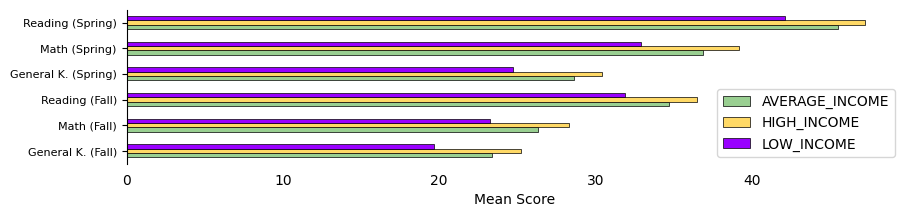

In [620]:
import matplotlib.pyplot as plt

# Plot settings
fig, ax = plt.subplots(figsize=(10, 2))

# Set facecolor of the subplots to white
ax.set_facecolor('white')

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)  # Hide bottom border for horizontal bars

# Remove x-axis tick marks
ax.xaxis.set_ticks_position('none')

# Set x and y-axis color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Generate and plot pivot table
income_group_pivot_table.drop(['DELTA_READING_SCORE', 'DELTA_MATH_SCORE', 'DELTA_GK_SCORE', 'INCOME_GROUP_NUM'], axis=1).T.plot(kind='barh', color=['#99cf91', '#ffd966', '#9900ff'], edgecolor='black', linewidth=0.5, ax=ax)

# Set labels and title
# ax.set_ylabel('Test Category', fontsize=10)
ax.set_xlabel('Mean Score', fontsize=10)
ax.legend().set_visible(True)

# Customize y-axis ticks
y_legend = ['General K. (Fall)', 'Math (Fall)', 'Reading (Fall)', 'General K. (Spring)', 'Math (Spring)', 'Reading (Spring)']
plt.yticks(range(0, 6), y_legend, fontsize=8, rotation=0)

# Show the plot
plt.show()

In [621]:
# Filter df
df_eda_4 = df[['INCOME_GROUP', 'DELTA_READING_SCORE', 'DELTA_MATH_SCORE', 'DELTA_GK_SCORE']]

In [622]:
# Display df information
df_eda_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10446 entries, 2 to 11932
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCOME_GROUP         10446 non-null  string 
 1   DELTA_READING_SCORE  10446 non-null  float64
 2   DELTA_MATH_SCORE     10446 non-null  float64
 3   DELTA_GK_SCORE       10446 non-null  float64
dtypes: float64(3), string(1)
memory usage: 408.0 KB


In [623]:
# Filter the DataFrame to include only rows where DELTA_GK_SCORE is greater than 0
filtered_df_positive = df_eda_4[df_eda_4['DELTA_GK_SCORE'] > 0]

# Filter the DataFrame to include only rows where DELTA_GK_SCORE is equal to 0
filtered_df_zero = df_eda_4[df_eda_4['DELTA_GK_SCORE'] == 0]

# Filter the DataFrame to include only rows where DELTA_GK_SCORE is smaller than 0
filtered_df_negative = df_eda_4[df_eda_4['DELTA_GK_SCORE'] < 0]

# group by INCOME_GROUP and count the number of students in each group for positive changes
count_df_positive = filtered_df_positive.groupby('INCOME_GROUP').size().reset_index(name='NET_POSITIVE')

# Group by INCOME_GROUP and count the number of students in each group for zero changes
count_df_zero = filtered_df_zero.groupby('INCOME_GROUP').size().reset_index(name='NET_ZERO')

# Group by INCOME_GROUP and count the number of students in each group for positive changes
count_df_negative = filtered_df_negative.groupby('INCOME_GROUP').size().reset_index(name='NET_NEGATIVE')

# Concatenate count_df_positive, count_df_zero, and count_df_negative
concatenated_gk_df = pd.concat([count_df_positive.set_index('INCOME_GROUP'),
                                count_df_zero.set_index('INCOME_GROUP'),
                                count_df_negative.set_index('INCOME_GROUP')], axis=1, join='outer').reset_index()

# Fill NaN values with 00
concatenated_gk_df = concatenated_gk_df.fillna(0)

# Calculate total count of students in each income group
concatenated_gk_df['TOTAL_STUDENTS'] = concatenated_gk_df['NET_POSITIVE'] + concatenated_gk_df['NET_ZERO'] + concatenated_gk_df['NET_NEGATIVE']

# Calculate proportional frequency
concatenated_gk_df['PROPORTIONAL_POSITIVE'] = concatenated_gk_df['NET_POSITIVE'] / concatenated_gk_df['TOTAL_STUDENTS']
concatenated_gk_df['PROPORTIONAL_ZERO'] = concatenated_gk_df['NET_ZERO'] / concatenated_gk_df['TOTAL_STUDENTS']
concatenated_gk_df['PROPORTIONAL_NEGATIVE'] = concatenated_gk_df['NET_NEGATIVE'] / concatenated_gk_df['TOTAL_STUDENTS']

# Display the concatenated df
concatenated_gk_df.sort_values(by='NET_POSITIVE', ascending=False)

INCOME_GROUP  NET_POSITIVE  NET_ZERO  NET_NEGATIVE  TOTAL_STUDENTS  \
2      LOW_INCOME          4085       0.0           455          4540.0   
0  AVERAGE_INCOME          3164       0.0           296          3460.0   
1     HIGH_INCOME          2213       1.0           232          2446.0   

   PROPORTIONAL_POSITIVE  PROPORTIONAL_ZERO  PROPORTIONAL_NEGATIVE  
2               0.899780           0.000000               0.100220  
0               0.914451           0.000000               0.085549  
1               0.904742           0.000409               0.094849

In [624]:
# Filter the DataFrame to include only rows where DELTA_READING_SCORE is greater than 0
filtered_df_positive = df_eda_4[df_eda_4['DELTA_READING_SCORE'] > 0]

# Filter the DataFrame to include only rows where DELTA_READING_SCORE is equal to 0
filtered_df_zero = df_eda_4[df_eda_4['DELTA_READING_SCORE'] == 0]

# Filter the DataFrame to include only rows where DELTA_READING_SCORE is smaller than 0
filtered_df_negative = df_eda_4[df_eda_4['DELTA_READING_SCORE'] < 0]

# Group by INCOME_GROUP and count the number of students in each group for positive changes
count_df_positive = filtered_df_positive.groupby('INCOME_GROUP').size().reset_index(name='NET_POSITIVE')

# Group by INCOME_GROUP and count the number of students in each group for zero changes
count_df_zero = filtered_df_zero.groupby('INCOME_GROUP').size().reset_index(name='NET_ZERO')

# Group by INCOME_GROUP and count the number of students in each group for positive changes
count_df_negative = filtered_df_negative.groupby('INCOME_GROUP').size().reset_index(name='NET_NEGATIVE')

# Concatenate count_df_positive, count_df_zero, and count_df_negative
concatenated_gk_df = pd.concat([count_df_positive.set_index('INCOME_GROUP'),
                                count_df_zero.set_index('INCOME_GROUP'),
                                count_df_negative.set_index('INCOME_GROUP')], axis=1, join='outer').reset_index()

# Fill NaN values with 0
concatenated_gk_df = concatenated_gk_df.fillna(0)

# Calculate total count of students in each income group
concatenated_gk_df['TOTAL_STUDENTS'] = concatenated_gk_df['NET_POSITIVE'] + concatenated_gk_df['NET_ZERO'] + concatenated_gk_df['NET_NEGATIVE']

# Calculate proportional frequency
concatenated_gk_df['PROPORTIONAL_POSITIVE'] = concatenated_gk_df['NET_POSITIVE'] / concatenated_gk_df['TOTAL_STUDENTS']
concatenated_gk_df['PROPORTIONAL_ZERO'] = concatenated_gk_df['NET_ZERO'] / concatenated_gk_df['TOTAL_STUDENTS']
concatenated_gk_df['PROPORTIONAL_NEGATIVE'] = concatenated_gk_df['NET_NEGATIVE'] / concatenated_gk_df['TOTAL_STUDENTS']

# Display concatenated df
concatenated_gk_df.sort_values(by='NET_POSITIVE', ascending=False)

INCOME_GROUP  NET_POSITIVE  NET_ZERO  NET_NEGATIVE  TOTAL_STUDENTS  \
2      LOW_INCOME          4416       1.0           123          4540.0   
0  AVERAGE_INCOME          3382       0.0            78          3460.0   
1     HIGH_INCOME          2393       0.0            53          2446.0   

   PROPORTIONAL_POSITIVE  PROPORTIONAL_ZERO  PROPORTIONAL_NEGATIVE  
2               0.972687            0.00022               0.027093  
0               0.977457            0.00000               0.022543  
1               0.978332            0.00000               0.021668

In [625]:
# Filter the DataFrame to include only rows where DELTA_MATH_SCORE is greater than 0
filtered_df_positive = df_eda_4[df_eda_4['DELTA_MATH_SCORE'] > 0]

# Filter the DataFrame to include only rows where DELTA_MATH_SCORE is equal to 0
filtered_df_zero = df_eda_4[df_eda_4['DELTA_MATH_SCORE'] == 0]

# Filter the DataFrame to include only rows where DELTA_MATH_SCORE is smaller than 0
filtered_df_negative = df_eda_4[df_eda_4['DELTA_MATH_SCORE'] < 0]

# Group by INCOME_GROUP and count the number of students in each group for positive changes
count_df_positive = filtered_df_positive.groupby('INCOME_GROUP').size().reset_index(name='NET_POSITIVE')

# Group by INCOME_GROUP and count the number of students in each group for zero changes
count_df_zero = filtered_df_zero.groupby('INCOME_GROUP').size().reset_index(name='NET_ZERO')

# Group by INCOME_GROUP and count the number of students in each group for positive changes
count_df_negative = filtered_df_negative.groupby('INCOME_GROUP').size().reset_index(name='NET_NEGATIVE')

# Concatenate count_df_positive, count_df_zero, and count_df_negative
concatenated_gk_df = pd.concat([count_df_positive.set_index('INCOME_GROUP'),
                                count_df_zero.set_index('INCOME_GROUP'),
                                count_df_negative.set_index('INCOME_GROUP')], axis=1, join='outer').reset_index()

# Fill NaN values with 0
concatenated_gk_df = concatenated_gk_df.fillna(0)

# Calculate total count of students in each income group
concatenated_gk_df['TOTAL_STUDENTS'] = concatenated_gk_df['NET_POSITIVE'] + concatenated_gk_df['NET_ZERO'] + concatenated_gk_df['NET_NEGATIVE']

# Calculate proportional frequency
concatenated_gk_df['PROPORTIONAL_POSITIVE'] = concatenated_gk_df['NET_POSITIVE'] / concatenated_gk_df['TOTAL_STUDENTS']
concatenated_gk_df['PROPORTIONAL_ZERO'] = concatenated_gk_df['NET_ZERO'] / concatenated_gk_df['TOTAL_STUDENTS']
concatenated_gk_df['PROPORTIONAL_NEGATIVE'] = concatenated_gk_df['NET_NEGATIVE'] / concatenated_gk_df['TOTAL_STUDENTS']

# Display the concat df
concatenated_gk_df.sort_values(by='NET_POSITIVE', ascending=False)

INCOME_GROUP  NET_POSITIVE  NET_ZERO  NET_NEGATIVE  TOTAL_STUDENTS  \
2      LOW_INCOME          4423       0.0           117          4540.0   
0  AVERAGE_INCOME          3376       0.0            84          3460.0   
1     HIGH_INCOME          2390       0.0            56          2446.0   

   PROPORTIONAL_POSITIVE  PROPORTIONAL_ZERO  PROPORTIONAL_NEGATIVE  
2               0.974229                0.0               0.025771  
0               0.975723                0.0               0.024277  
1               0.977105                0.0               0.022895

## Assumptions & Conditions

In [626]:
# Create a new df_eda_5 by removing the INCOME_GROUP column
df_eda_5 = df.drop('INCOME_GROUP', axis=1)

In [627]:
# This function checks if the data is normally distributed
def is_normal_distribution(data, alpha=0.05):
    # Check if there are at least 20 data points
    if len(data) < 20:
        return False

    # Perform the Shapiro-Wilk test for normality
    try:
        stat, p_value = stats.shapiro(data)
        # Return True if the p-value is greater than the significance level
        return p_value > alpha
    except Exception as e:
        print(f"Error occurred while conducting Shapiro-Wilk test: {e}")
        return False

# Test each column for normality
for column in df_eda_5.columns:
    data = df_eda_5[column]
    is_normal = is_normal_distribution(data)
    print(f"Column '{column}' is normally distributed: {is_normal}")

Column 'FALL_READING_SCORE' is normally distributed: False
Column 'FALL_MATH_SCORE' is normally distributed: False
Column 'FALL_GK_SCORE' is normally distributed: False
Column 'SPRING_READING_SCORE' is normally distributed: False
Column 'SPRING_MATH_SCORE' is normally distributed: False
Column 'SPRING_GK_SCORE' is normally distributed: False
Column 'TOTAL_HOUSEHOLD_INCOME' is normally distributed: False
Column 'INCOME_THOUSANDS' is normally distributed: False
Column 'INCOME_GROUP_NUM' is normally distributed: False
Column 'DELTA_READING_SCORE' is normally distributed: False
Column 'DELTA_MATH_SCORE' is normally distributed: False
Column 'DELTA_GK_SCORE' is normally distributed: False


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Research Question #1


**Research Question 1: Does the change in general knowledge scores from fall to spring evaluations vary based on income groups?**



$$\hat{y} = b_0 + b_1x$$

$$b_1 = r \cdot \frac{s_y}{s_x}$$

$$b_0 = \bar{y} - b_1x$$

In [628]:
# Define list of columns to select
r1_columns = ['FALL_READING_SCORE', 'SPRING_READING_SCORE', 'FALL_MATH_SCORE',
              'SPRING_MATH_SCORE', 'FALL_GK_SCORE', 'SPRING_GK_SCORE', 'TOTAL_HOUSEHOLD_INCOME']


## High Income Analysis

In [629]:
# Create a df scores for high-income households
high_income_scores_df = df[r1_columns][df['INCOME_GROUP'] == 'HIGH_INCOME']

#Display df
high_income_scores_df

FALL_READING_SCORE  SPRING_READING_SCORE  FALL_MATH_SCORE  \
2                   40.68                 40.41            28.57   
7                   33.30                 36.72            26.85   
9                   34.20                 39.87            22.27   
31                  40.55                 49.72            33.97   
43                  37.79                 57.68            33.78   
...                   ...                   ...              ...   
11883               40.49                 46.83            22.39   
11886               26.46                 51.80            26.79   
11906               39.22                 51.06            26.20   
11908               41.00                 58.23            45.95   
11920               38.75                 42.94            27.51   

       SPRING_MATH_SCORE  FALL_GK_SCORE  SPRING_GK_SCORE  \
2                  32.81         28.108           29.312   
7                  32.22         27.072           33.730   
9                  27.44         28.096           32.374   
31                 42.03         17.817           22.745   
43                 37.68         23.882           32.149   
...                  ...            ...              ...   
11883              27.79         24.095           23.031   
11886              39.16         28.885           33.801   
11906              45.11         32.341           39.051   
11908              66.29         32.667           37.855   
11920              34.56         32.108           34.220   

       TOTAL_HOUSEHOLD_INCOME  
2                     90000.0  
7                     70000.0  
9                     78000.0  
31                    85000.0  
43                   106000.0  
...                       ...  
11883                 70000.0  
11886                100000.0  
11906                 70000.0  
11908                 80000.0  
11920                 75000.0  

[2446 rows x 7 columns]

### Reading Scores

In [630]:
import statsmodels.formula.api as sm

# Fit the ols regression
response = sm.ols(formula="SPRING_READING_SCORE ~ FALL_READING_SCORE", data=high_income_scores_df).fit()

# Print summary
print(response.summary())

                             OLS Regression Results                             
Dep. Variable:     SPRING_READING_SCORE   R-squared:                       0.469
Model:                              OLS   Adj. R-squared:                  0.469
Method:                   Least Squares   F-statistic:                     2160.
Date:                  Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                          02:31:31   Log-Likelihood:                -7882.6
No. Observations:                  2446   AIC:                         1.577e+04
Df Residuals:                      2444   BIC:                         1.578e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

$$\hat{\beta_0}=11.607$$

$$\hat{\beta_1}=0.969$$

$$\hat{y} = 11.607 + 0.969x$$

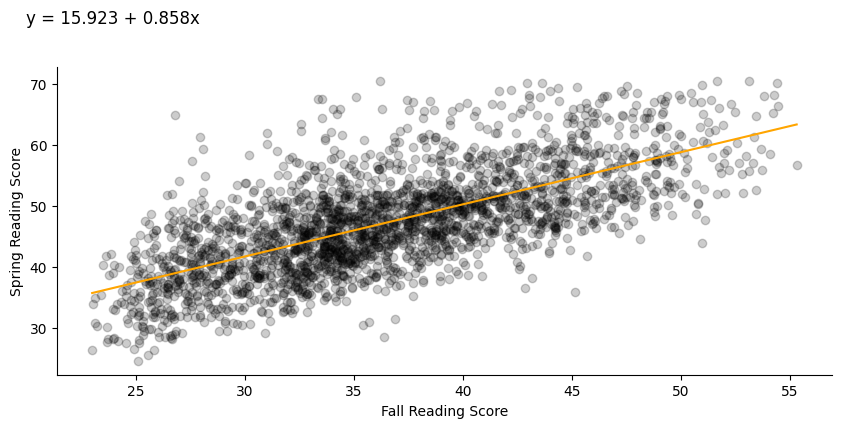

In [631]:
# Plot settings
fig, ax = plt.subplots(figsize=(10, 4))

# Set facecolor of the subplots to white
ax.set_facecolor('white')

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x and y-axis color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Scatter plot
plt.scatter(high_income_scores_df['FALL_READING_SCORE'], high_income_scores_df['SPRING_READING_SCORE'], color='black', alpha=.2)

# OLS regression line
x_values = np.linspace(high_income_scores_df['FALL_READING_SCORE'].min(), high_income_scores_df['FALL_READING_SCORE'].max(), 100)
y_values = response.params[1] * x_values + response.params[0]
plt.plot(x_values, y_values, color='orange', label='OLS Regression')

# Add fitted regression equation to plot
plt.text(20, 80, f'y = {response.params[0]:.3f} + {response.params[1]:.3f}x', size=12)

# Add axis labels and legend
plt.xlabel('Fall Reading Score')
plt.ylabel('Spring Reading Score')

# Show plot
plt.show()

### Math Scores

In [632]:
# Fit the ols regression
response = sm.ols(formula="SPRING_MATH_SCORE ~ FALL_MATH_SCORE", data=high_income_scores_df).fit()

# Print summary
print(response.summary())

                            OLS Regression Results                            
Dep. Variable:      SPRING_MATH_SCORE   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     2847.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:31:32   Log-Likelihood:                -7943.5
No. Observations:                2446   AIC:                         1.589e+04
Df Residuals:                    2444   BIC:                         1.590e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.7683      0.529     

$$\hat{\beta_0}=11.768$$

$$\hat{\beta_1}=0.969$$

$$\hat{y} = 11.768 + 0.969x$$

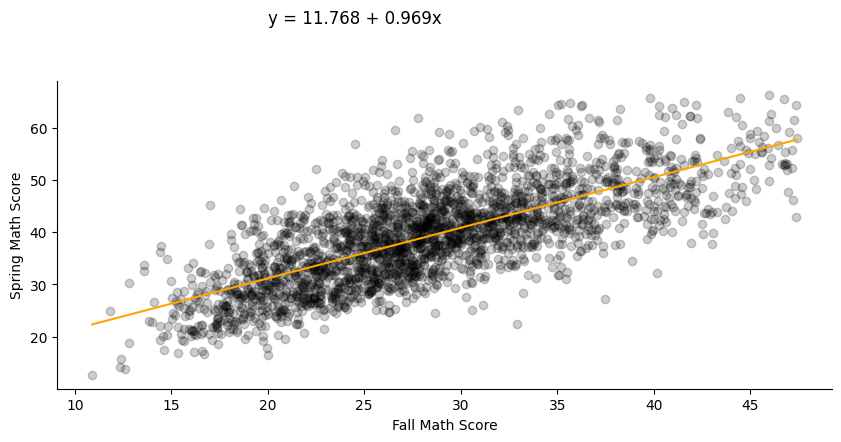

In [633]:
# Plot settings
fig, ax = plt.subplots(figsize=(10, 4))

# Set facecolor of the subplots to white
ax.set_facecolor('white')

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x and y-axis color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Scatter plot
plt.scatter(high_income_scores_df['FALL_MATH_SCORE'], high_income_scores_df['SPRING_MATH_SCORE'], color='black', alpha=.2)

# OLS regression line
x_values = np.linspace(high_income_scores_df['FALL_MATH_SCORE'].min(), high_income_scores_df['FALL_MATH_SCORE'].max(), 100)
y_values = response.params[1] * x_values + response.params[0]
plt.plot(x_values, y_values, color='orange', label='OLS Regression')

# Add fitted regression equation to plot
plt.text(20, 80, f'y = {response.params[0]:.3f} + {response.params[1]:.3f}x', size=12)

# Add axis labels and legend
plt.xlabel('Fall Math Score')
plt.ylabel('Spring Math Score')

# Show plot
plt.show()

### General Knowledge Scores

In [634]:
# Fit the ols regression
response = sm.ols(formula="SPRING_GK_SCORE ~ FALL_GK_SCORE", data=high_income_scores_df).fit()

# Print summary
print(response.summary())

                            OLS Regression Results                            
Dep. Variable:        SPRING_GK_SCORE   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     5149.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:31:32   Log-Likelihood:                -6763.4
No. Observations:                2446   AIC:                         1.353e+04
Df Residuals:                    2444   BIC:                         1.354e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.6446      0.300     32.200

$$\hat{\beta_0}=9.645$$

$$\hat{\beta_1}=0.822$$

$$\hat{y} = 9.645 + 0.822x$$

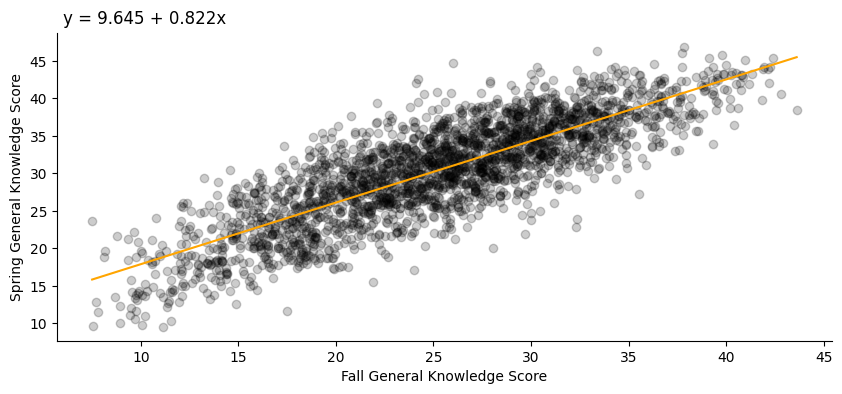

In [635]:
# Plot settings
fig, ax = plt.subplots(figsize=(10, 4))

# Set facecolor of the subplots to white
ax.set_facecolor('white')

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x and y-axis color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Scatter plot
plt.scatter(high_income_scores_df['FALL_GK_SCORE'], high_income_scores_df['SPRING_GK_SCORE'], color='black', alpha=.2)

# OLS regression line
x_values = np.linspace(high_income_scores_df['FALL_GK_SCORE'].min(), high_income_scores_df['FALL_GK_SCORE'].max(), 100)
y_values = response.params[1] * x_values + response.params[0]
plt.plot(x_values, y_values, color='orange', label='OLS Regression')

# Add fitted regression equation to plot
plt.text(6, 50, f'y = {response.params[0]:.3f} + {response.params[1]:.3f}x', size=12)

# Add axis labels and legend
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Spring General Knowledge Score')

# Show plot
plt.show()

## Average Income Analysis

In [636]:
# Create a df w/ scores for average-income households
avg_income_scores_df = df[r1_columns][df['INCOME_GROUP'] == 'AVERAGE_INCOME']

#Display df
avg_income_scores_df

FALL_READING_SCORE  SPRING_READING_SCORE  FALL_MATH_SCORE  \
3                   32.57                 34.14            23.57   
4                   31.98                 32.84            19.65   
6                   32.49                 38.52            20.82   
11                  43.01                 46.24            33.26   
14                  26.85                 33.15            25.83   
...                   ...                   ...              ...   
11913               42.84                 57.51            31.99   
11919               33.58                 35.99            36.64   
11921               38.36                 42.50            28.98   
11926               24.99                 33.80            19.09   
11930               40.44                 49.93            30.50   

       SPRING_MATH_SCORE  FALL_GK_SCORE  SPRING_GK_SCORE  \
3                  35.25         15.404           27.382   
4                  23.60         18.727           26.977   
6                  29.09         26.211           29.612   
11                 35.24         24.710           34.898   
14                 34.26         23.977           30.030   
...                  ...            ...              ...   
11913              38.32         20.170           26.686   
11919              46.90         26.804           30.018   
11921              35.36         23.238           25.364   
11926              31.38         23.342           26.218   
11930              41.00         16.836           19.803   

       TOTAL_HOUSEHOLD_INCOME  
3                     50000.0  
4                     55000.0  
6                     42000.0  
11                    50000.0  
14                    41000.0  
...                       ...  
11913                 50000.0  
11919                 41000.0  
11921                 50000.0  
11926                 40000.0  
11930                 45000.0  

[3460 rows x 7 columns]

### Reading Scores

In [637]:
import statsmodels.formula.api as sm

# Fit the OLs regression
response = sm.ols(formula="SPRING_READING_SCORE ~ FALL_READING_SCORE", data=avg_income_scores_df).fit()

# Print summary
print(response.summary())

                             OLS Regression Results                             
Dep. Variable:     SPRING_READING_SCORE   R-squared:                       0.499
Model:                              OLS   Adj. R-squared:                  0.499
Method:                   Least Squares   F-statistic:                     3449.
Date:                  Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                          02:31:32   Log-Likelihood:                -11141.
No. Observations:                  3460   AIC:                         2.229e+04
Df Residuals:                      3458   BIC:                         2.230e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

$$\hat{\beta_0}=12.746$$

$$\hat{\beta_1}=0.944$$

$$\hat{y} = 12.746 + 0.944x$$

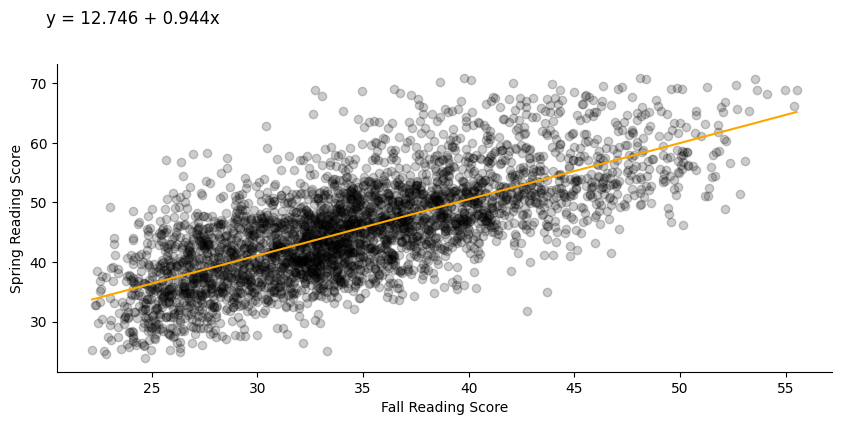

In [638]:
# Plot settings
fig, ax = plt.subplots(figsize=(10, 4))

# Set facecolor of the subplots to white
ax.set_facecolor('white')

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x and y-axis color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Scatter plot
plt.scatter(avg_income_scores_df['FALL_READING_SCORE'], avg_income_scores_df['SPRING_READING_SCORE'], color='black', alpha=.2)

# OLS regression line
x_values = np.linspace(avg_income_scores_df['FALL_READING_SCORE'].min(), avg_income_scores_df['FALL_READING_SCORE'].max(), 100)
y_values = response.params[1] * x_values + response.params[0]
plt.plot(x_values, y_values, color='orange', label='OLS Regression')

# Add fitted regression equation to plot
plt.text(20, 80, f'y = {response.params[0]:.3f} + {response.params[1]:.3f}x', size=12)

# Add axis labels and legend
plt.xlabel('Fall Reading Score')
plt.ylabel('Spring Reading Score')

# Show plot
plt.show()

### Math Scores

In [639]:
import statsmodels.formula.api as sm

# Fit the Ordinary Least Squares regression
response = sm.ols(formula="SPRING_MATH_SCORE ~ FALL_MATH_SCORE", data=avg_income_scores_df).fit()

# Print summary
print(response.summary())

                            OLS Regression Results                            
Dep. Variable:      SPRING_MATH_SCORE   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     4438.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:31:33   Log-Likelihood:                -11177.
No. Observations:                3460   AIC:                         2.236e+04
Df Residuals:                    3458   BIC:                         2.237e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5256      0.409     

$$\hat{\beta_0}=10.526$$

$$\hat{\beta_1}=0.999$$

$$\hat{y} = 10.526 + 0.999x$$

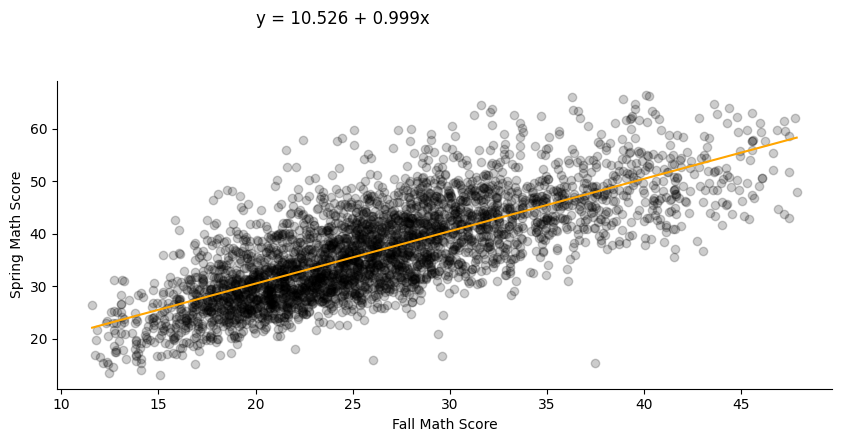

In [640]:
# Plot settings
fig, ax = plt.subplots(figsize=(10, 4))

# Set facecolor of the subplots to white
ax.set_facecolor('white')

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x and y-axis color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Scatter plot
plt.scatter(avg_income_scores_df['FALL_MATH_SCORE'], avg_income_scores_df['SPRING_MATH_SCORE'], color='black', alpha=.2)

# OLS regression line
x_values = np.linspace(avg_income_scores_df['FALL_MATH_SCORE'].min(), avg_income_scores_df['FALL_MATH_SCORE'].max(), 100)
y_values = response.params[1] * x_values + response.params[0]
plt.plot(x_values, y_values, color='orange', label='OLS Regression')

# Add fitted regression equation to plot
plt.text(20, 80, f'y = {response.params[0]:.3f} + {response.params[1]:.3f}x', size=12)

# Add axis labels and legend
plt.xlabel('Fall Math Score')
plt.ylabel('Spring Math Score')

# Show plot
plt.show()

### General Knowledge Scores

In [641]:
# Fit the OLS regression
response = sm.ols(formula="SPRING_GK_SCORE ~ FALL_GK_SCORE", data=avg_income_scores_df).fit()

# Print summary
print(response.summary())

                            OLS Regression Results                            
Dep. Variable:        SPRING_GK_SCORE   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     6965.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:31:33   Log-Likelihood:                -9615.6
No. Observations:                3460   AIC:                         1.924e+04
Df Residuals:                    3458   BIC:                         1.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.1301      0.243     37.573

$$\hat{\beta_0}=9.130$$

$$\hat{\beta_1}=0.834$$

$$\hat{y} = 9.130 + 0.834x$$

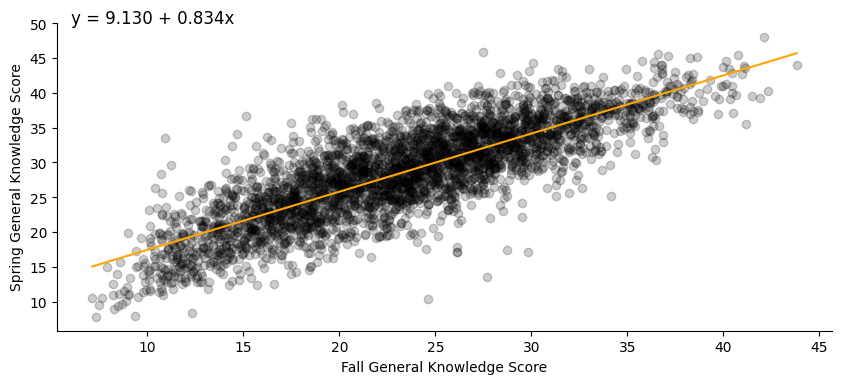

In [642]:
# Plot settings
fig, ax = plt.subplots(figsize=(10, 4))

# Set facecolor of the subplots to white
ax.set_facecolor('white')

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x and y-axis color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Scatter plot
plt.scatter(avg_income_scores_df['FALL_GK_SCORE'], avg_income_scores_df['SPRING_GK_SCORE'], color='black', alpha=.2)

# OLS regression line
x_values = np.linspace(avg_income_scores_df['FALL_GK_SCORE'].min(), avg_income_scores_df['FALL_GK_SCORE'].max(), 100)
y_values = response.params[1] * x_values + response.params[0]
plt.plot(x_values, y_values, color='orange', label='OLS Regression')

# Add fitted regression equation to plot
plt.text(6, 50, f'y = {response.params[0]:.3f} + {response.params[1]:.3f}x', size=12)

# Add axis labels and legend
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Spring General Knowledge Score')

# Show plot
plt.show()

## Low Income Analysis

In [643]:
# Create a df with scores for low-income households
low_income_scores_df = df[r1_columns][df['INCOME_GROUP'] == 'AVERAGE_INCOME']
low_income_scores_df

FALL_READING_SCORE  SPRING_READING_SCORE  FALL_MATH_SCORE  \
3                   32.57                 34.14            23.57   
4                   31.98                 32.84            19.65   
6                   32.49                 38.52            20.82   
11                  43.01                 46.24            33.26   
14                  26.85                 33.15            25.83   
...                   ...                   ...              ...   
11913               42.84                 57.51            31.99   
11919               33.58                 35.99            36.64   
11921               38.36                 42.50            28.98   
11926               24.99                 33.80            19.09   
11930               40.44                 49.93            30.50   

       SPRING_MATH_SCORE  FALL_GK_SCORE  SPRING_GK_SCORE  \
3                  35.25         15.404           27.382   
4                  23.60         18.727           26.977   
6                  29.09         26.211           29.612   
11                 35.24         24.710           34.898   
14                 34.26         23.977           30.030   
...                  ...            ...              ...   
11913              38.32         20.170           26.686   
11919              46.90         26.804           30.018   
11921              35.36         23.238           25.364   
11926              31.38         23.342           26.218   
11930              41.00         16.836           19.803   

       TOTAL_HOUSEHOLD_INCOME  
3                     50000.0  
4                     55000.0  
6                     42000.0  
11                    50000.0  
14                    41000.0  
...                       ...  
11913                 50000.0  
11919                 41000.0  
11921                 50000.0  
11926                 40000.0  
11930                 45000.0  

[3460 rows x 7 columns]

### Reading Scores

In [644]:
import statsmodels.formula.api as sm

# Fit the OLS regression
response = sm.ols(formula="SPRING_READING_SCORE ~ FALL_READING_SCORE", data=low_income_scores_df).fit()

# Print summary
print(response.summary())

                             OLS Regression Results                             
Dep. Variable:     SPRING_READING_SCORE   R-squared:                       0.499
Model:                              OLS   Adj. R-squared:                  0.499
Method:                   Least Squares   F-statistic:                     3449.
Date:                  Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                          02:31:33   Log-Likelihood:                -11141.
No. Observations:                  3460   AIC:                         2.229e+04
Df Residuals:                      3458   BIC:                         2.230e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

$$\hat{\beta_0}=12.746$$

$$\hat{\beta_1}=0.944$$

$$\hat{y} = 12.746 + 0.944x$$

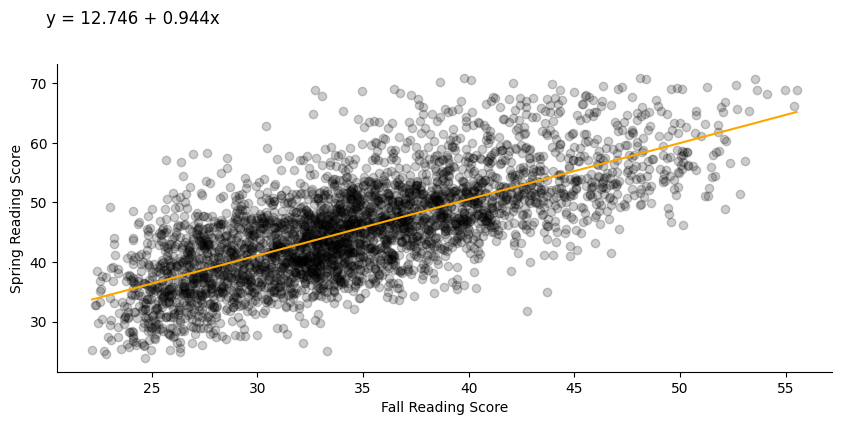

In [645]:
# Plot settings
fig, ax = plt.subplots(figsize=(10, 4))

# Set facecolor of the subplots to white
ax.set_facecolor('white')

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x and y-axis color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Scatter plot
plt.scatter(low_income_scores_df['FALL_READING_SCORE'], low_income_scores_df['SPRING_READING_SCORE'], color='black', alpha=.2)

# OLS regression line
x_values = np.linspace(low_income_scores_df['FALL_READING_SCORE'].min(), low_income_scores_df['FALL_READING_SCORE'].max(), 100)
y_values = response.params[1] * x_values + response.params[0]
plt.plot(x_values, y_values, color='orange', label='OLS Regression')

# Add fitted regression equation to plot
plt.text(20, 80, f'y = {response.params[0]:.3f} + {response.params[1]:.3f}x', size=12)

# Add axis labels and legend
plt.xlabel('Fall Reading Score')
plt.ylabel('Spring Reading Score')

# Show plot
plt.show()

### Math Scores

In [646]:
import statsmodels.formula.api as sm

# Fit the OLS regression
response = sm.ols(formula="SPRING_MATH_SCORE ~ FALL_MATH_SCORE", data=low_income_scores_df).fit()

# Print summary
print(response.summary())

                            OLS Regression Results                            
Dep. Variable:      SPRING_MATH_SCORE   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     4438.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:31:34   Log-Likelihood:                -11177.
No. Observations:                3460   AIC:                         2.236e+04
Df Residuals:                    3458   BIC:                         2.237e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5256      0.409     

$$\hat{\beta_0}=10.526$$

$$\hat{\beta_1}=0.999$$

$$\hat{y} = 10.526 + 0.999x$$

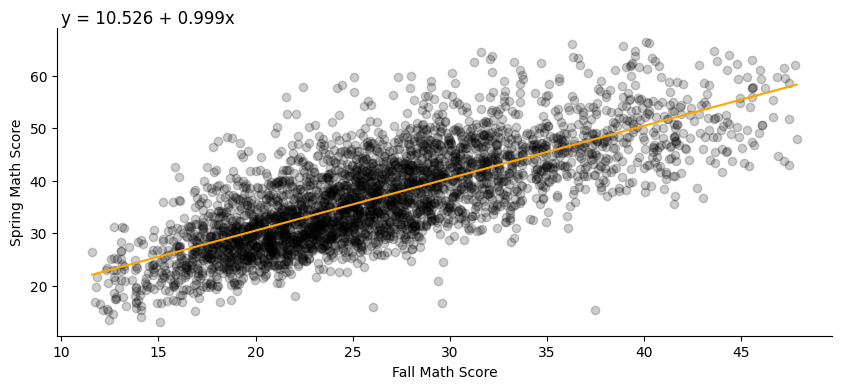

In [647]:
# Plot settings
fig, ax = plt.subplots(figsize=(10, 4))

# Set facecolor of the subplots to white
ax.set_facecolor('white')

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x and y-axis color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Scatter plot
plt.scatter(low_income_scores_df['FALL_MATH_SCORE'], low_income_scores_df['SPRING_MATH_SCORE'], color='black', alpha=.2)

# OLS regression line
x_values = np.linspace(low_income_scores_df['FALL_MATH_SCORE'].min(), low_income_scores_df['FALL_MATH_SCORE'].max(), 100)
y_values = response.params[1] * x_values + response.params[0]
plt.plot(x_values, y_values, color='orange', label='OLS Regression')

# Add fitted regression equation to plot
plt.text(10, 70, f'y = {response.params[0]:.3f} + {response.params[1]:.3f}x', size=12)

# Add axis labels and legend
plt.xlabel('Fall Math Score')
plt.ylabel('Spring Math Score')

# Show plot
plt.show()

### General Knowledge Scores

In [648]:
# Fit the OLS regression
response = sm.ols(formula="SPRING_GK_SCORE ~ FALL_GK_SCORE", data=low_income_scores_df).fit()

# Print summary
print(response.summary())

                            OLS Regression Results                            
Dep. Variable:        SPRING_GK_SCORE   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     6965.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:31:34   Log-Likelihood:                -9615.6
No. Observations:                3460   AIC:                         1.924e+04
Df Residuals:                    3458   BIC:                         1.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.1301      0.243     37.573

$$\hat{\beta_0}=9.130$$

$$\hat{\beta_1}=0.834$$

$$\hat{y} = 9.130 + 0.834x$$

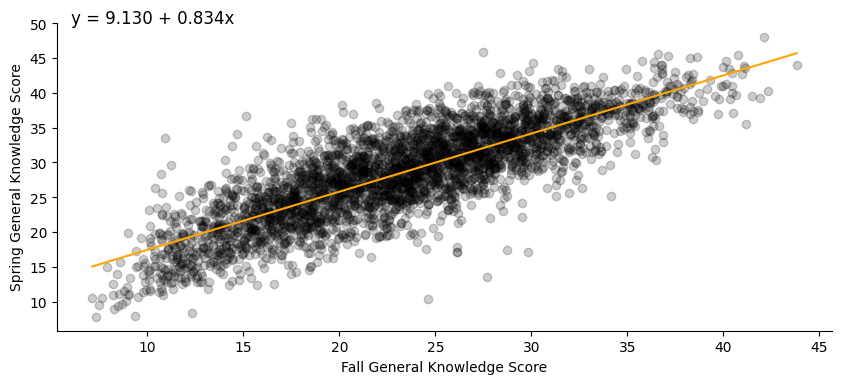

In [649]:
# Plot settings
fig, ax = plt.subplots(figsize=(10, 4))

# Set facecolor of the subplots to white
ax.set_facecolor('white')

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x and y-axis color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Scatter plot
plt.scatter(low_income_scores_df['FALL_GK_SCORE'], low_income_scores_df['SPRING_GK_SCORE'], color='black', alpha=.2)

# OLS regression line
x_values = np.linspace(low_income_scores_df['FALL_GK_SCORE'].min(), low_income_scores_df['FALL_GK_SCORE'].max(), 100)
y_values = response.params[1] * x_values + response.params[0]
plt.plot(x_values, y_values, color='orange', label='OLS Regression')

# Add fitted regression equation to plot
plt.text(6, 50, f'y = {response.params[0]:.3f} + {response.params[1]:.3f}x', size=12)

# Add axis labels and legend
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Spring General Knowledge Score')

# Show plot
plt.show()

# Research Question #2


**Research Question 1: How does income group predict Spring math scores among kindergarten students, after controlling for their Fall math scores?**





*   **DV:** SPRING_MATH_SCORE (Numerical Variable)
*   **IV:** INCOME_GROUP [Low Income, Average Income, High Income] (Categorical Variable)
*   **COVARIATE:** FALL_MATH_SCORE (Numerical Variable)

$$Spring Math Score= \hat{\beta_0} + \hat{\beta_1} (AverageIncome) + \hat{\beta_2} (HighIncome) + \hat{\beta_3}(Fall Math Score) +  \epsilon$$

In [650]:
# Copy nd store df
df_r2 = df.copy()

In [651]:
# Display df
df_r2

FALL_READING_SCORE  FALL_MATH_SCORE  FALL_GK_SCORE  \
2                   40.68            28.57         28.108   
3                   32.57            23.57         15.404   
4                   31.98            19.65         18.727   
6                   32.49            20.82         26.211   
7                   33.30            26.85         27.072   
...                   ...              ...            ...   
11928               32.51            25.68         11.694   
11929               31.96            25.73         21.461   
11930               40.44            30.50         16.836   
11931               35.51            28.96         28.864   
11932               23.47            14.30         15.256   

       SPRING_READING_SCORE  SPRING_MATH_SCORE  SPRING_GK_SCORE  \
2                     40.41              32.81           29.312   
3                     34.14              35.25           27.382   
4                     32.84              23.60           26.977   
6                     38.52              29.09           29.612   
7                     36.72              32.22           33.730   
...                     ...                ...              ...   
11928                 45.63              24.27           20.189   
11929                 47.84              40.35           32.357   
11930                 49.93              41.00           19.803   
11931                 51.60              50.27           35.991   
11932                 31.41              17.49           18.283   

       TOTAL_HOUSEHOLD_INCOME  INCOME_THOUSANDS    INCOME_GROUP  \
2                     90000.0              90.0     HIGH_INCOME   
3                     50000.0              50.0  AVERAGE_INCOME   
4                     55000.0              55.0  AVERAGE_INCOME   
6                     42000.0              42.0  AVERAGE_INCOME   
7                     70000.0              70.0     HIGH_INCOME   
...                       ...               ...             ...   
11928                 39000.0              39.0      LOW_INCOME   
11929                 26000.0              26.0      LOW_INCOME   
11930                 45000.0              45.0  AVERAGE_INCOME   
11931                 28000.0              28.0      LOW_INCOME   
11932                 13000.0              13.0      LOW_INCOME   

       INCOME_GROUP_NUM  DELTA_READING_SCORE  DELTA_MATH_SCORE  DELTA_GK_SCORE  
2                     3                -0.27              4.24           1.204  
3                     2                 1.57             11.68          11.978  
4                     2                 0.86              3.95           8.250  
6                     2                 6.03              8.27           3.401  
7                     3                 3.42              5.37           6.658  
...                 ...                  ...               ...             ...  
11928                 1                13.12             -1.41           8.495  
11929                 1                15.88             14.62          10.896  
11930                 2                 9.49             10.50           2.967  
11931                 1                16.09             21.31           7.127  
11932                 1                 7.94              3.19           3.027  

[10446 rows x 13 columns]

<Figure size 1800x300 with 0 Axes>

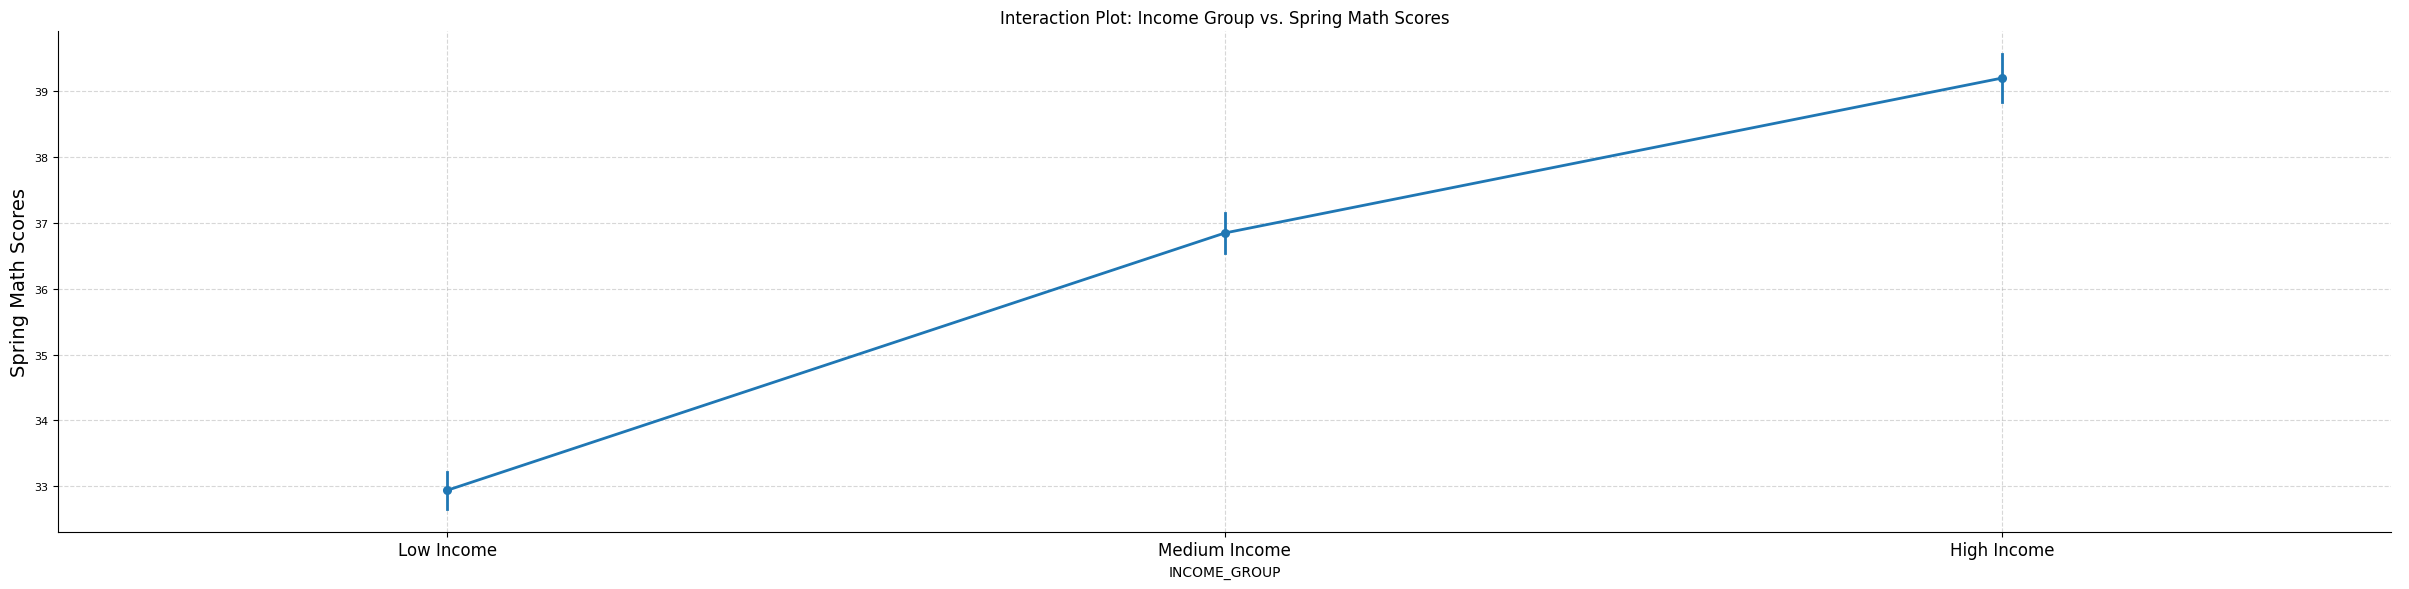

In [652]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order of x-axis values
income_order = ['LOW_INCOME', 'AVERAGE_INCOME', 'HIGH_INCOME']
income_labels = ['Low Income', 'Medium Income', 'High Income']

# Set the size of the plot
plt.figure(figsize=(18, 3))

# Interaction plot
sns.catplot(x='INCOME_GROUP', y='SPRING_MATH_SCORE', kind='point', data=df_r2, order=income_order,
            height=6, aspect=4, linewidth=2)

plt.title('Interaction Plot: Income Group vs. Spring Math Scores', fontsize=12)
plt.ylabel('Spring Math Scores', fontsize=14)
plt.xticks(ticks=range(len(income_order)), labels=income_labels, fontsize=12)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##Model Assumption & Conditions

###Homogeneity of Regression Slopes

In [653]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assumption 1: Homogeneity of regression slopes

# Fit the interaction model
interaction_model = ols('SPRING_MATH_SCORE ~ FALL_MATH_SCORE * C(INCOME_GROUP_NUM)', data=df_r2).fit()

# Perform ANOVA
interaction_anova = sm.stats.anova_lm(interaction_model, typ=2)

# Display results
interaction_anova

sum_sq       df             F  \
C(INCOME_GROUP_NUM)                    1649.274673      2.0     22.210622   
FALL_MATH_SCORE                      515983.487762      1.0  13897.399119   
FALL_MATH_SCORE:C(INCOME_GROUP_NUM)    1669.845371      2.0     22.487646   
Residual                             387616.960994  10440.0           NaN   

                                           PR(>F)  
C(INCOME_GROUP_NUM)                  2.368715e-10  
FALL_MATH_SCORE                      0.000000e+00  
FALL_MATH_SCORE:C(INCOME_GROUP_NUM)  1.797694e-10  
Residual                                      NaN

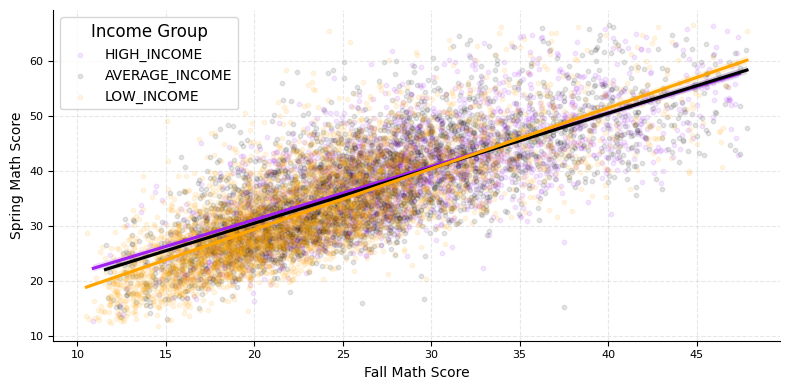

In [654]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create palete for plot
custom_palette = {'LOW_INCOME': 'orange', 'AVERAGE_INCOME': '#000000', 'HIGH_INCOME': '#A020F0'}

# Fit the interaction model
interaction_model = ols('SPRING_MATH_SCORE ~ FALL_MATH_SCORE * C(INCOME_GROUP_NUM)', data=df_r2).fit()

# Plot the regression slopes
sns.lmplot(x='FALL_MATH_SCORE', y='SPRING_MATH_SCORE', hue='INCOME_GROUP', data=df_r2, palette=custom_palette, scatter_kws={'s': 10, 'alpha': 0.1}, height=4, aspect=2, legend=False)

# Format the legend
plt.legend(title='Income Group', title_fontsize='12', fontsize='10', loc='best')

plt.xlabel('Fall Math Score', fontsize=10)
plt.ylabel('Spring Math Score', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


###Normality of Residuals

In [655]:
from scipy.stats import shapiro

# Assumption 2: Normality of residuals
residuals = interaction_model.resid

# Run Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk test p-value:", shapiro_test.pvalue)

Shapiro-Wilk test p-value: 5.3212832959420105e-33


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


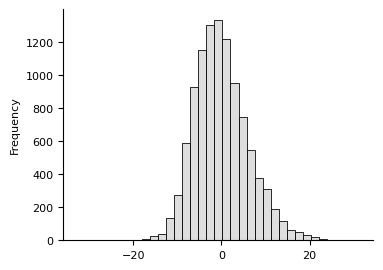

In [656]:
# Plot histograms for the data above on one canvas
fig, ax = plt.subplots(figsize=(4, 3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot histogram with KDE for Etobicoke data
sns.histplot(residuals, bins=35, edgecolor='black', color='lightgrey', kde=False)

plt.ylabel('Frequency', fontsize=8)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Show the plot
plt.show()

###Homogeneity of Variances

In [657]:
from scipy.stats import levene

# Assumption 3: Homogeneity of variances
levene_test = levene(df_r2[df_r2['INCOME_GROUP_NUM'] == 1]['SPRING_MATH_SCORE'],
                     df_r2[df_r2['INCOME_GROUP_NUM'] == 2]['SPRING_MATH_SCORE'],
                     df_r2[df_r2['INCOME_GROUP_NUM'] == 2]['SPRING_MATH_SCORE'])
# # Print to console
print("Levene's test p-value:", levene_test.pvalue)


Levene's test p-value: 0.999929147225297


In [658]:
from statsmodels.formula.api import ols

# Conduct one-way ANCOVA
model = ols('SPRING_MATH_SCORE ~ C(INCOME_GROUP_NUM) + FALL_MATH_SCORE', data=df_r2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display results
print(model.summary())
anova_table

                            OLS Regression Results                            
Dep. Variable:      SPRING_MATH_SCORE   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     5232.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:31:38   Log-Likelihood:                -33720.
No. Observations:               10446   AIC:                         6.745e+04
Df Residuals:                   10442   BIC:                         6.748e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

sum_sq       df             F        PR(>F)
C(INCOME_GROUP_NUM)    1649.274673      2.0     22.119586  2.593451e-10
FALL_MATH_SCORE      515983.487762      1.0  13840.437156  0.000000e+00
Residual             389286.806365  10442.0           NaN           NaN

# Research Question #3


**Research Question 3: Is there a significant difference in general knowledge scores between fall and spring evaluations, when controlling for household income?**



$$GK_{score}= \hat{\beta_0} + \hat{\beta_1} (Eval_{SPRING}) + \hat{\beta_2}(TotalIncome) +  \epsilon$$



*   **DV:** GK_SCORE (Numerical Variable) -> General Knowledge Score
*   **IV:** EVALUATION_SESSION [Fall, Spring] (Categorical Variable)
*   **COVARIATE:** TOTAL_HOUSEHOLD_INCOME (Numerical Variable)

In [659]:
df = df

In [660]:
# Selecting the required columns for the ANCOVA analysis
df_r3 = df[['FALL_GK_SCORE', 'SPRING_GK_SCORE', 'TOTAL_HOUSEHOLD_INCOME']]

# Renaming the columns for clarity
df_r3.columns = ['FALL', 'SPRING', 'TOTAL_HOUSEHOLD_INCOME']

# Melt the df to have a single column for the general knowledge score and a column for the evaluation time
df_r3 = df_r3.melt(id_vars='TOTAL_HOUSEHOLD_INCOME', var_name='EVALUATION_SESSION', value_name='GENERAL_KNOWLEDGE_SCORE')

# Print df
df_r3


TOTAL_HOUSEHOLD_INCOME EVALUATION_SESSION  GENERAL_KNOWLEDGE_SCORE
0                     90000.0               FALL                   28.108
1                     50000.0               FALL                   15.404
2                     55000.0               FALL                   18.727
3                     42000.0               FALL                   26.211
4                     70000.0               FALL                   27.072
...                       ...                ...                      ...
20887                 39000.0             SPRING                   20.189
20888                 26000.0             SPRING                   32.357
20889                 45000.0             SPRING                   19.803
20890                 28000.0             SPRING                   35.991
20891                 13000.0             SPRING                   18.283

[20892 rows x 3 columns]

##Model Assumption & Conditions

###Linearity

<Figure size 1000x600 with 0 Axes>

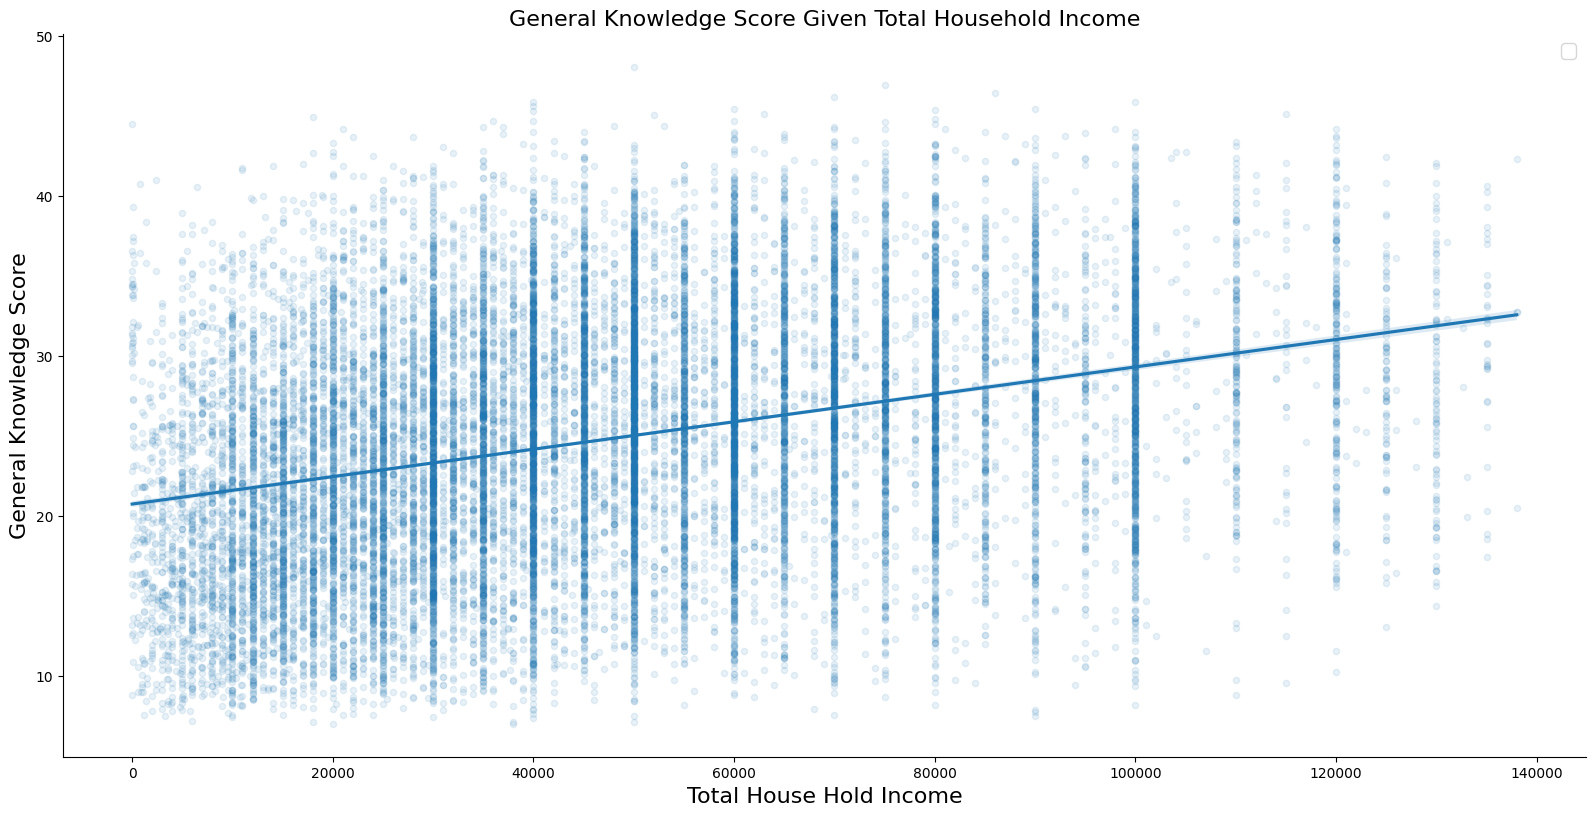

In [661]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure with white background
plt.figure(figsize=(10, 6), facecolor='white')

# Set the background color of the current figure
plt.gcf().set_facecolor('white')

# Scatter plot with color based on EVALUATION_SESSION and trendline
sns.lmplot(data=df_r3, x='TOTAL_HOUSEHOLD_INCOME', y='GENERAL_KNOWLEDGE_SCORE', scatter_kws={'s': 20, 'alpha': 0.1}, height=8, aspect=2)

# Add labels and title
plt.title('General Knowledge Score Given Total Household Income', fontsize=16)
plt.xlabel('Total House Hold Income', fontsize=16)
plt.ylabel('General Knowledge Score', fontsize=16)
plt.legend(fontsize=14)

# Displaying plot
plt.show()


In [662]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit a linear regression model
linear_model = ols('GENERAL_KNOWLEDGE_SCORE ~ TOTAL_HOUSEHOLD_INCOME', data=df_r3).fit()

# Print the summary of the linear regression model
print(linear_model.summary())

                               OLS Regression Results                              
Dep. Variable:     GENERAL_KNOWLEDGE_SCORE   R-squared:                       0.103
Model:                                 OLS   Adj. R-squared:                  0.103
Method:                      Least Squares   F-statistic:                     2410.
Date:                     Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                             02:31:41   Log-Likelihood:                -70947.
No. Observations:                    20892   AIC:                         1.419e+05
Df Residuals:                        20890   BIC:                         1.419e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

###Homogeneity of Regression Slopes

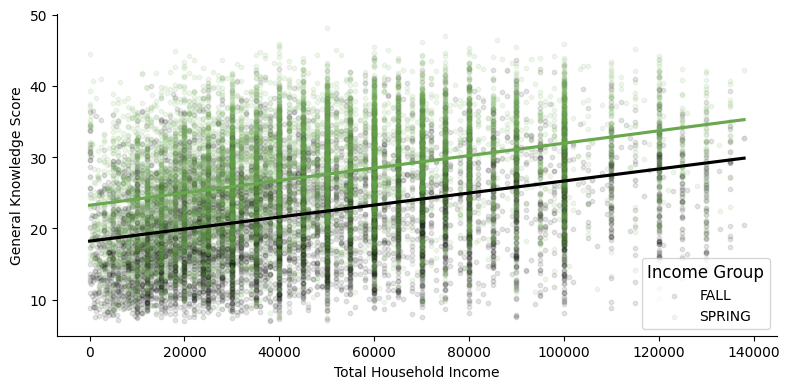

In [663]:
import matplotlib.patches as mpatches

# Custom color palette
custom_palette = {'FALL': '#000000', 'SPRING': '#6aa84f'}

# Scatter plot with color based on EVALUATION_SESSION and trendline
sns.lmplot(data=df_r3, x='TOTAL_HOUSEHOLD_INCOME', y='GENERAL_KNOWLEDGE_SCORE', hue='EVALUATION_SESSION', ci=None, scatter_kws={'s': 10, 'alpha': 0.1}, palette=custom_palette, height=4, aspect=2, legend=False)

# Create custom legend patches with adjusted alpha value
legend_patches = [mpatches.Patch(color=color, label=label, alpha=1) for label, color in custom_palette.items()]

# Adding custom legend with adjusted alpha value
# Format the legend
plt.legend(title='Income Group', title_fontsize='12', fontsize='10', loc='best')

# Adding labels and title
#plt.title('General Knowledge Score Given Total Household Income per Evaluation Period (Fall/Spring)', fontsize=16)
plt.xlabel('Total Household Income', fontsize=10)
plt.ylabel('General Knowledge Score', fontsize=10)

# Displaying plot
plt.show()


The lines are parallel -> there is homogeneity of the regression slopes!

In [664]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Fit the interaction model for high-income group
interaction_model = ols('GENERAL_KNOWLEDGE_SCORE ~ TOTAL_HOUSEHOLD_INCOME * EVALUATION_SESSION', data=df_r3).fit()

# Perform ANOVA
anova_results = anova_lm(interaction_model, typ=3)

# Print results
anova_results


sum_sq       df  \
Intercept                                  924895.167466      1.0   
EVALUATION_SESSION                          35307.268392      1.0   
TOTAL_HOUSEHOLD_INCOME                      60837.021807      1.0   
TOTAL_HOUSEHOLD_INCOME:EVALUATION_SESSION      31.890825      1.0   
Residual                                   950173.745706  20888.0   

                                                      F         PR(>F)  
Intercept                                  20332.292221   0.000000e+00  
EVALUATION_SESSION                           776.171964  9.477225e-168  
TOTAL_HOUSEHOLD_INCOME                      1337.401414  7.200886e-284  
TOTAL_HOUSEHOLD_INCOME:EVALUATION_SESSION      0.701067   4.024349e-01  
Residual                                            NaN            NaN

  ### Normality of Residuals

In [665]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Conduct one-way ANCOVA model
model = ols('GENERAL_KNOWLEDGE_SCORE ~ EVALUATION_SESSION + TOTAL_HOUSEHOLD_INCOME', data=df_r3).fit()

# Print the summary of the model
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     GENERAL_KNOWLEDGE_SCORE   R-squared:                       0.218
Model:                                 OLS   Adj. R-squared:                  0.218
Method:                      Least Squares   F-statistic:                     2910.
Date:                     Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                             02:31:42   Log-Likelihood:                -69520.
No. Observations:                    20892   AIC:                         1.390e+05
Df Residuals:                        20889   BIC:                         1.391e+05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [666]:
# Calculate residuals and add them as a new column
df_r3['RESIDUALS'] = linear_model.resid

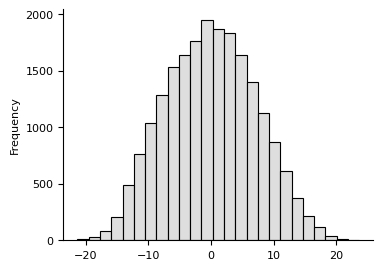

In [667]:
# Plot histograms for the data above on one canvas
fig, ax = plt.subplots(figsize=(4, 3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot histogram with KDE for Etobicoke data
sns.histplot(df_r3['RESIDUALS'], bins=25, edgecolor='black', color='lightgrey', kde=False)

plt.ylabel('Frequency', fontsize=8)
plt.xlabel('', fontsize=8)  # Hide x-axis label

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Show the plot
plt.show()

In [668]:
# Run Shapiro test
stats.shapiro(df_r3['RESIDUALS'])

# ***May be  inaccurate for sample since greater than 5000

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9955494403839111, pvalue=1.826571335652839e-24)

### Homegeneity of Variances

In [669]:
# Filter residuals for the FALL evaluation session
residuals_fall = df_r3.loc[df_r3['EVALUATION_SESSION'] == 'FALL', 'RESIDUALS']

# Filter residuals for the SPRING evaluation session
residuals_spring = df_r3.loc[df_r3['EVALUATION_SESSION'] == 'SPRING', 'RESIDUALS']

In [670]:
# Perform Levene's test
w, pvalue = stats.levene(residuals_fall, residuals_spring)

# Print the results
print("Levene's test statistic:", w)
print("p-value:", pvalue)

Levene's test statistic: 12.352667320308708
p-value: 0.00044128869223628936
